In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.keras import regularizers


# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

import os

In [30]:
import os
import pandas as pd

# Folder containing your CICIDS CSV files
DATA_FOLDER =  "../dataset"

# List of specific files to load
csv_files = [
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
]

# Load and combine CSVs
df = pd.DataFrame()

for file in csv_files:
    path = os.path.join(DATA_FOLDER, file)
    if os.path.exists(path):
        temp_df = pd.read_csv(path)
        df = pd.concat([df, temp_df], ignore_index=True)

# Show shape
df.shape



(2830743, 79)

In [13]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [32]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [16]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [17]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [18]:
df[' Label'].value_counts()
 

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [33]:
df.dropna(inplace=True)


In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    # Filter columns with unique values between 1 and 50
    nunique = df.nunique()
    columns_to_plot = df.columns[(nunique > 1) & (nunique < 50)]
    df_to_plot = df[columns_to_plot]

    n_rows, n_cols = df_to_plot.shape
    column_names = list(df_to_plot.columns)
    
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row  # Use integer division
    plt.figure(num=None, figsize=(6 * n_graph_per_row, 8 * n_graph_row), dpi=80, facecolor='w', edgecolor='k')

    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_data = df_to_plot[col_name]

        if not np.issubdtype(type(column_data.iloc[0]), np.number):
            value_counts = column_data.value_counts()
            value_counts.plot.bar()
        else:
            column_data.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{col_name} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()



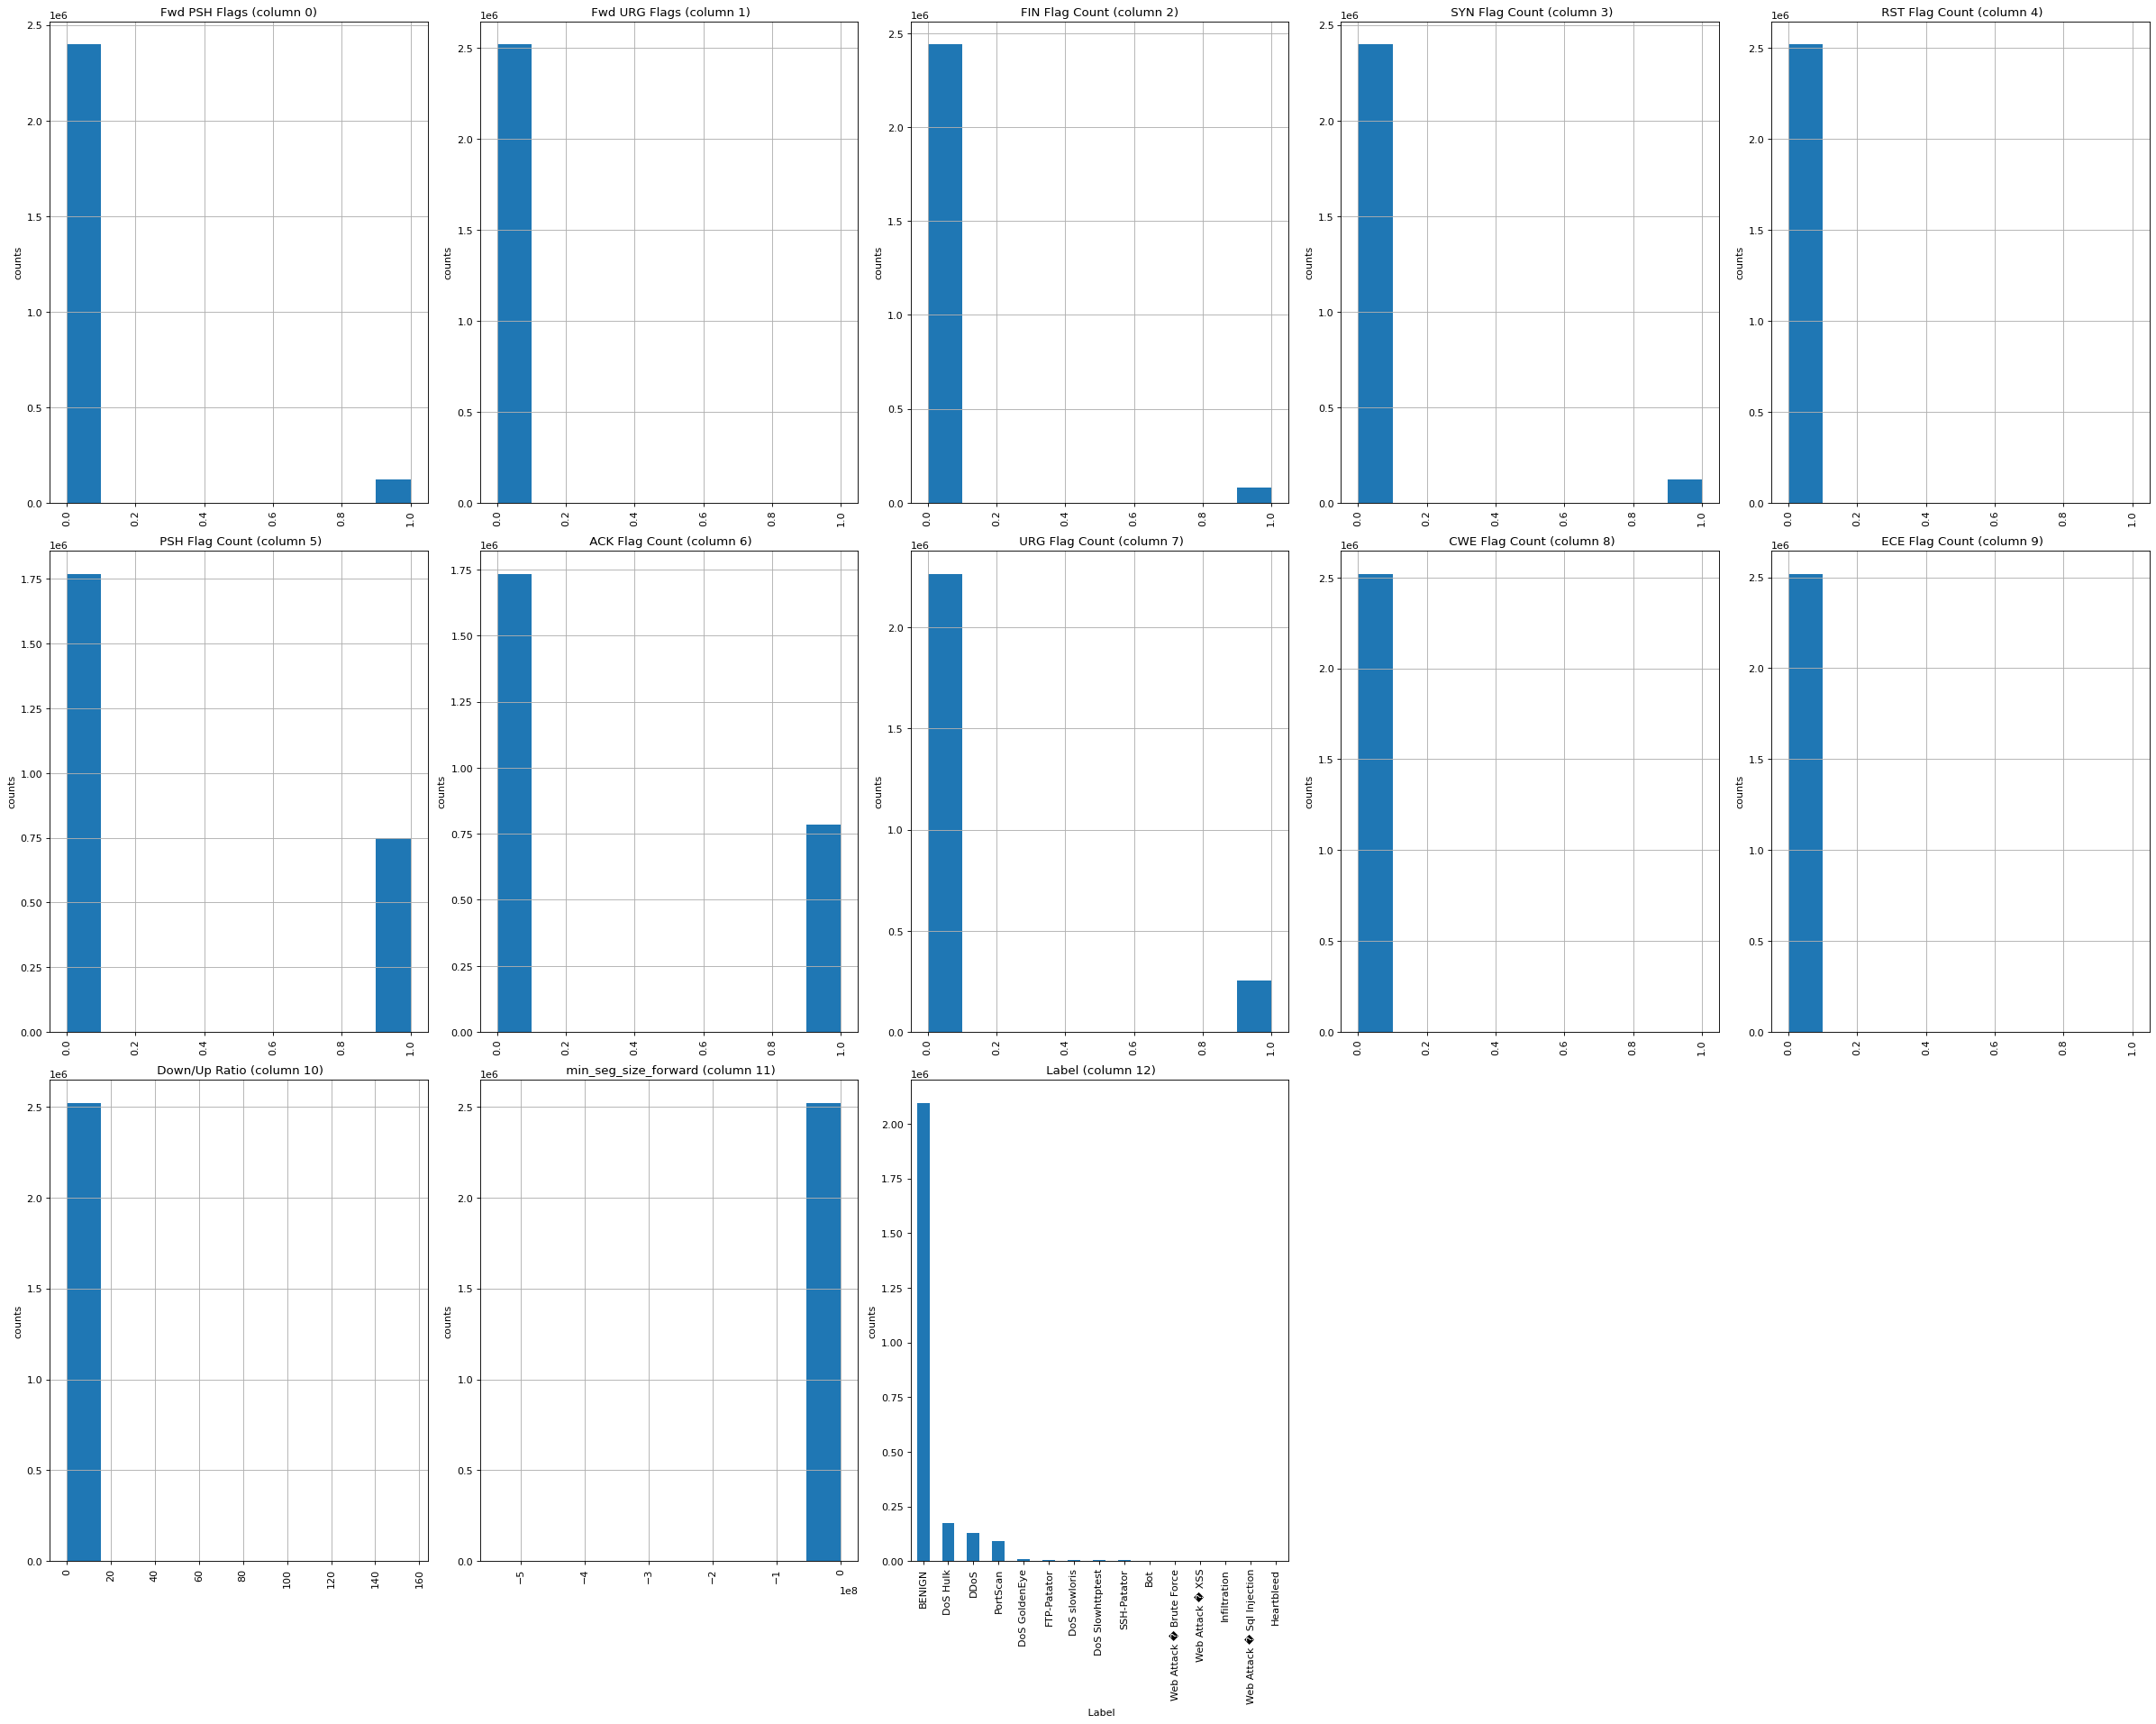

In [64]:
plt.rcParams['figure.figsize'] = (30, 30)

plot_per_column_distribution(df, 79, 5)


In [43]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind="bar")

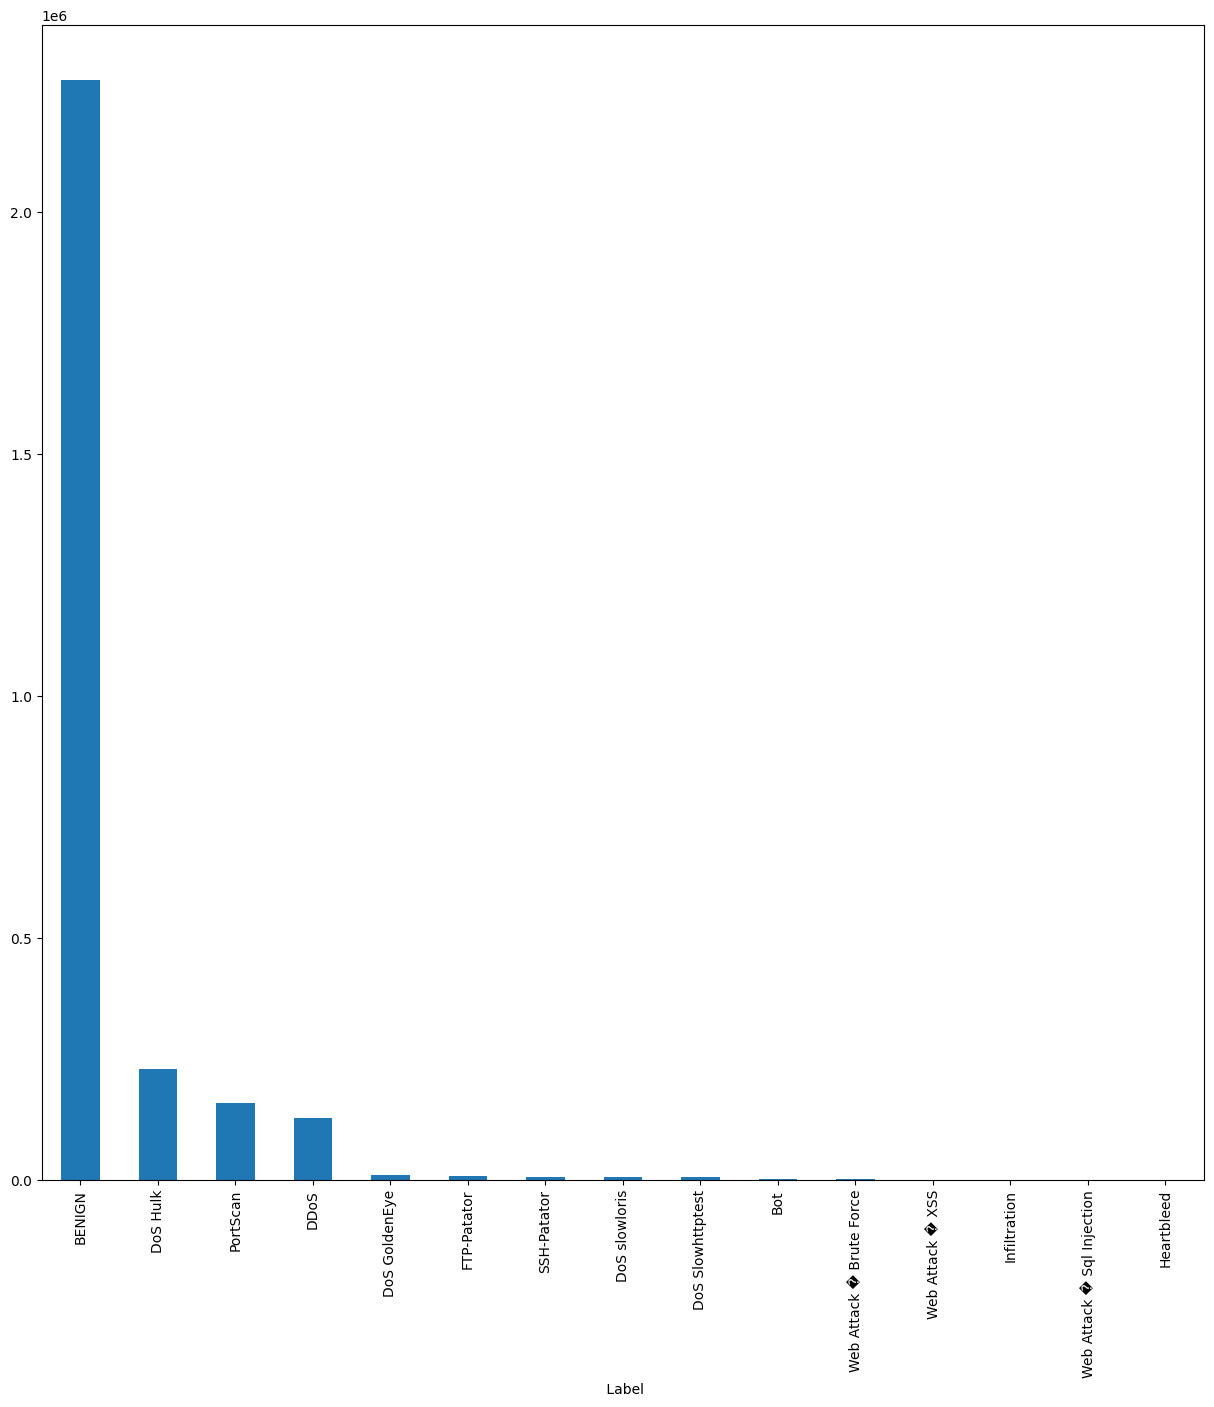

In [23]:
plt.rcParams['figure.figsize'] = (15,15)
bar_graph(" Label")

C:\Users\Dell\AppData\Local\Temp\ipykernel_12360\3414318362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = df[' Flow Duration'])


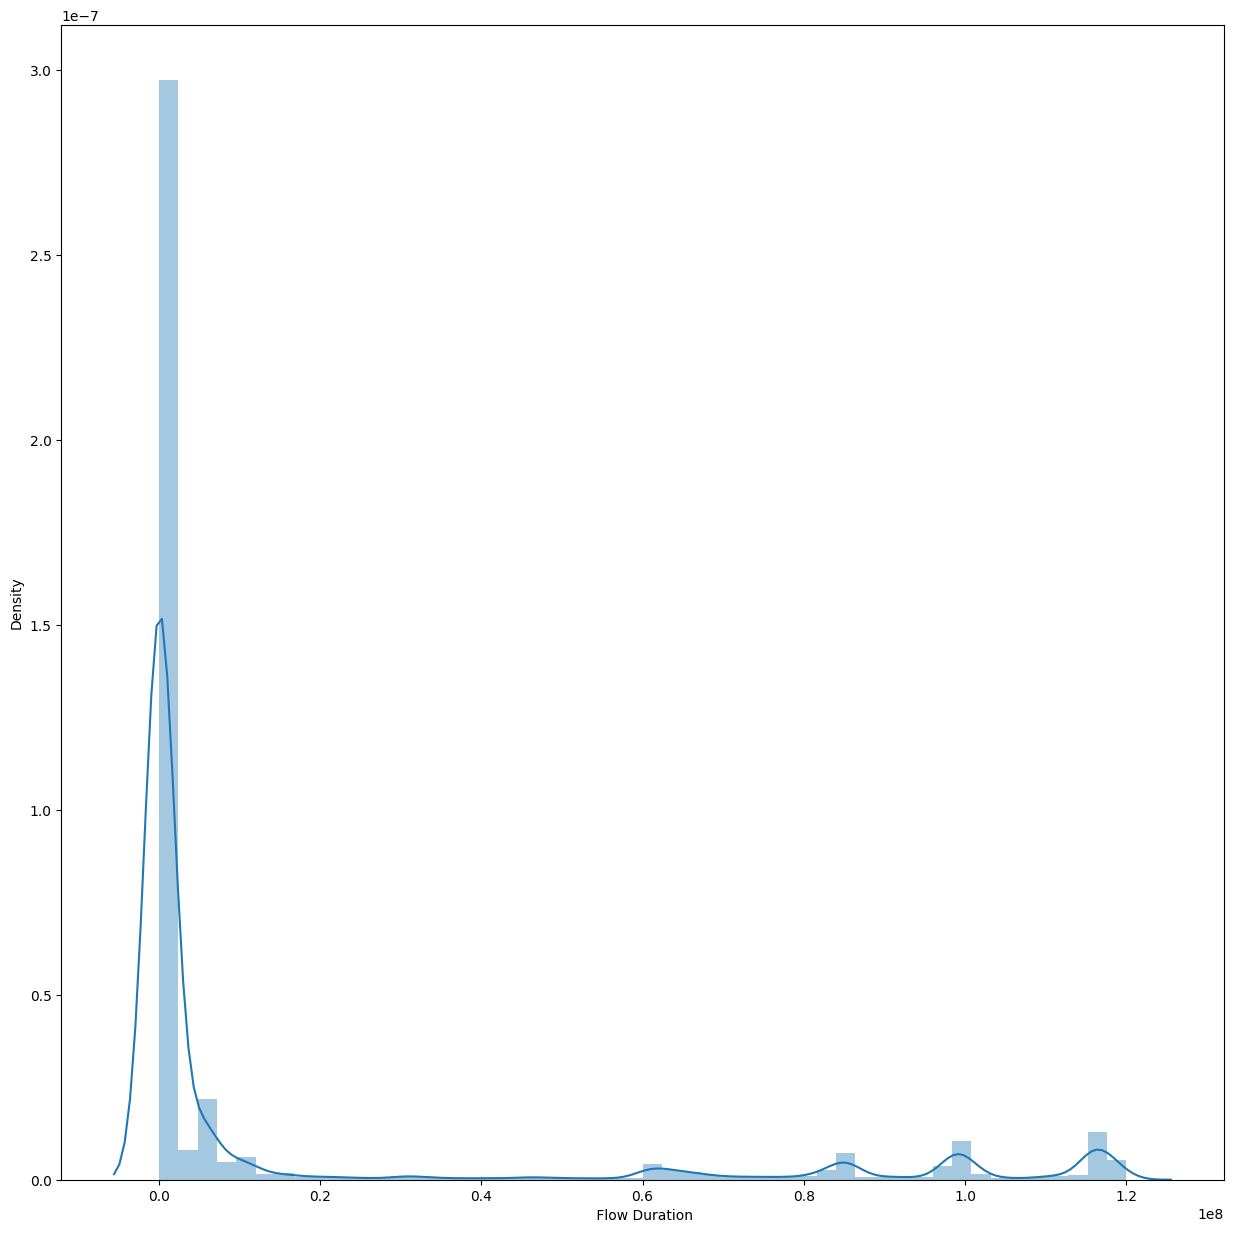

In [57]:
import seaborn as sns
p = sns.distplot(a = df[' Flow Duration'])
plt.show()

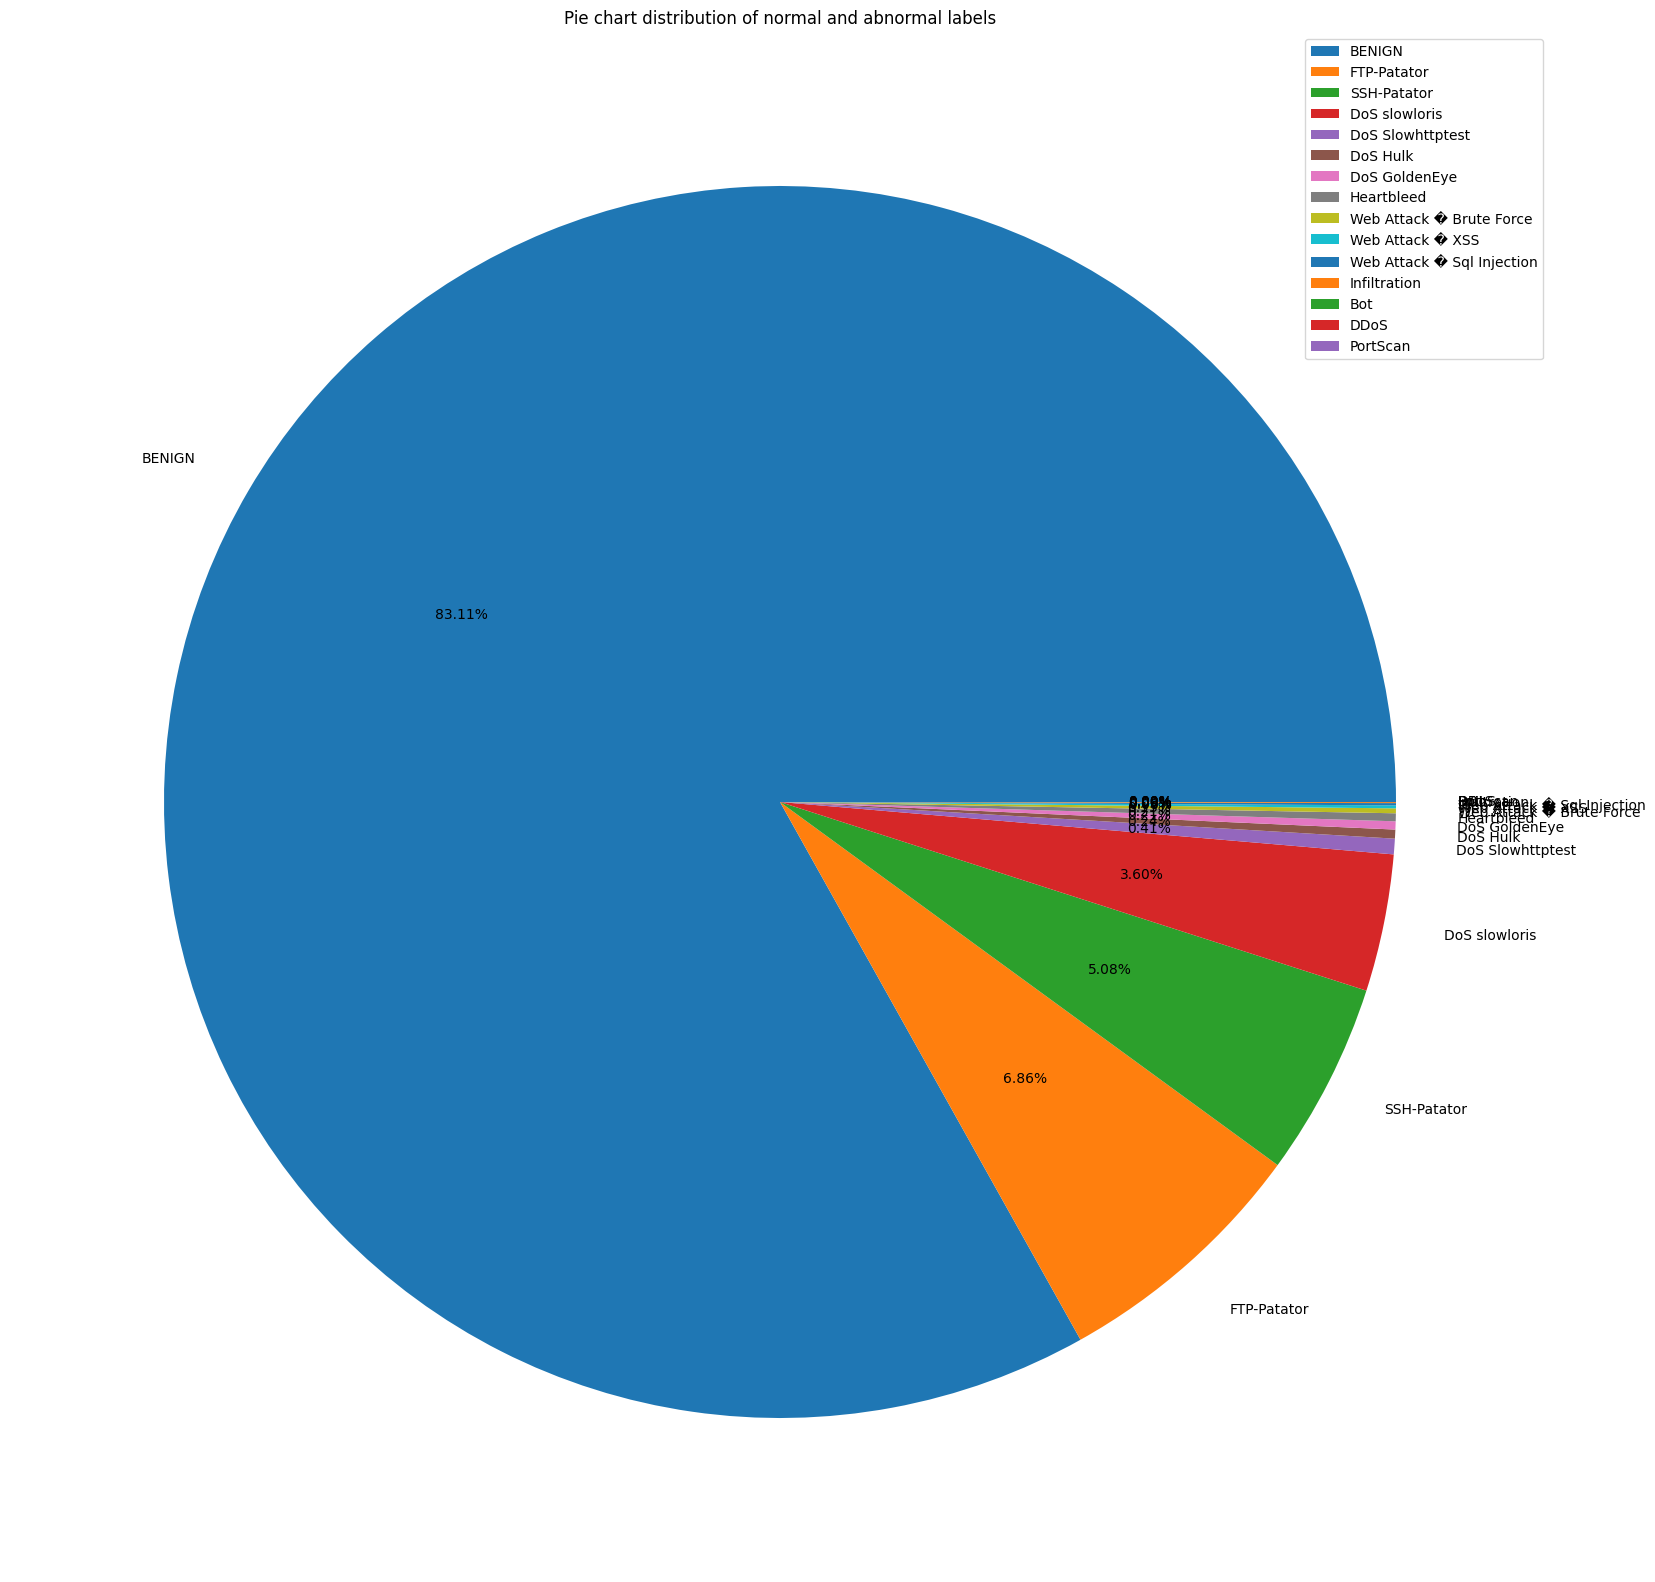

In [65]:
plt.figure(figsize=(20,20))
plt.pie(df[' Label'].value_counts(),labels=df[' Label'].unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show() 

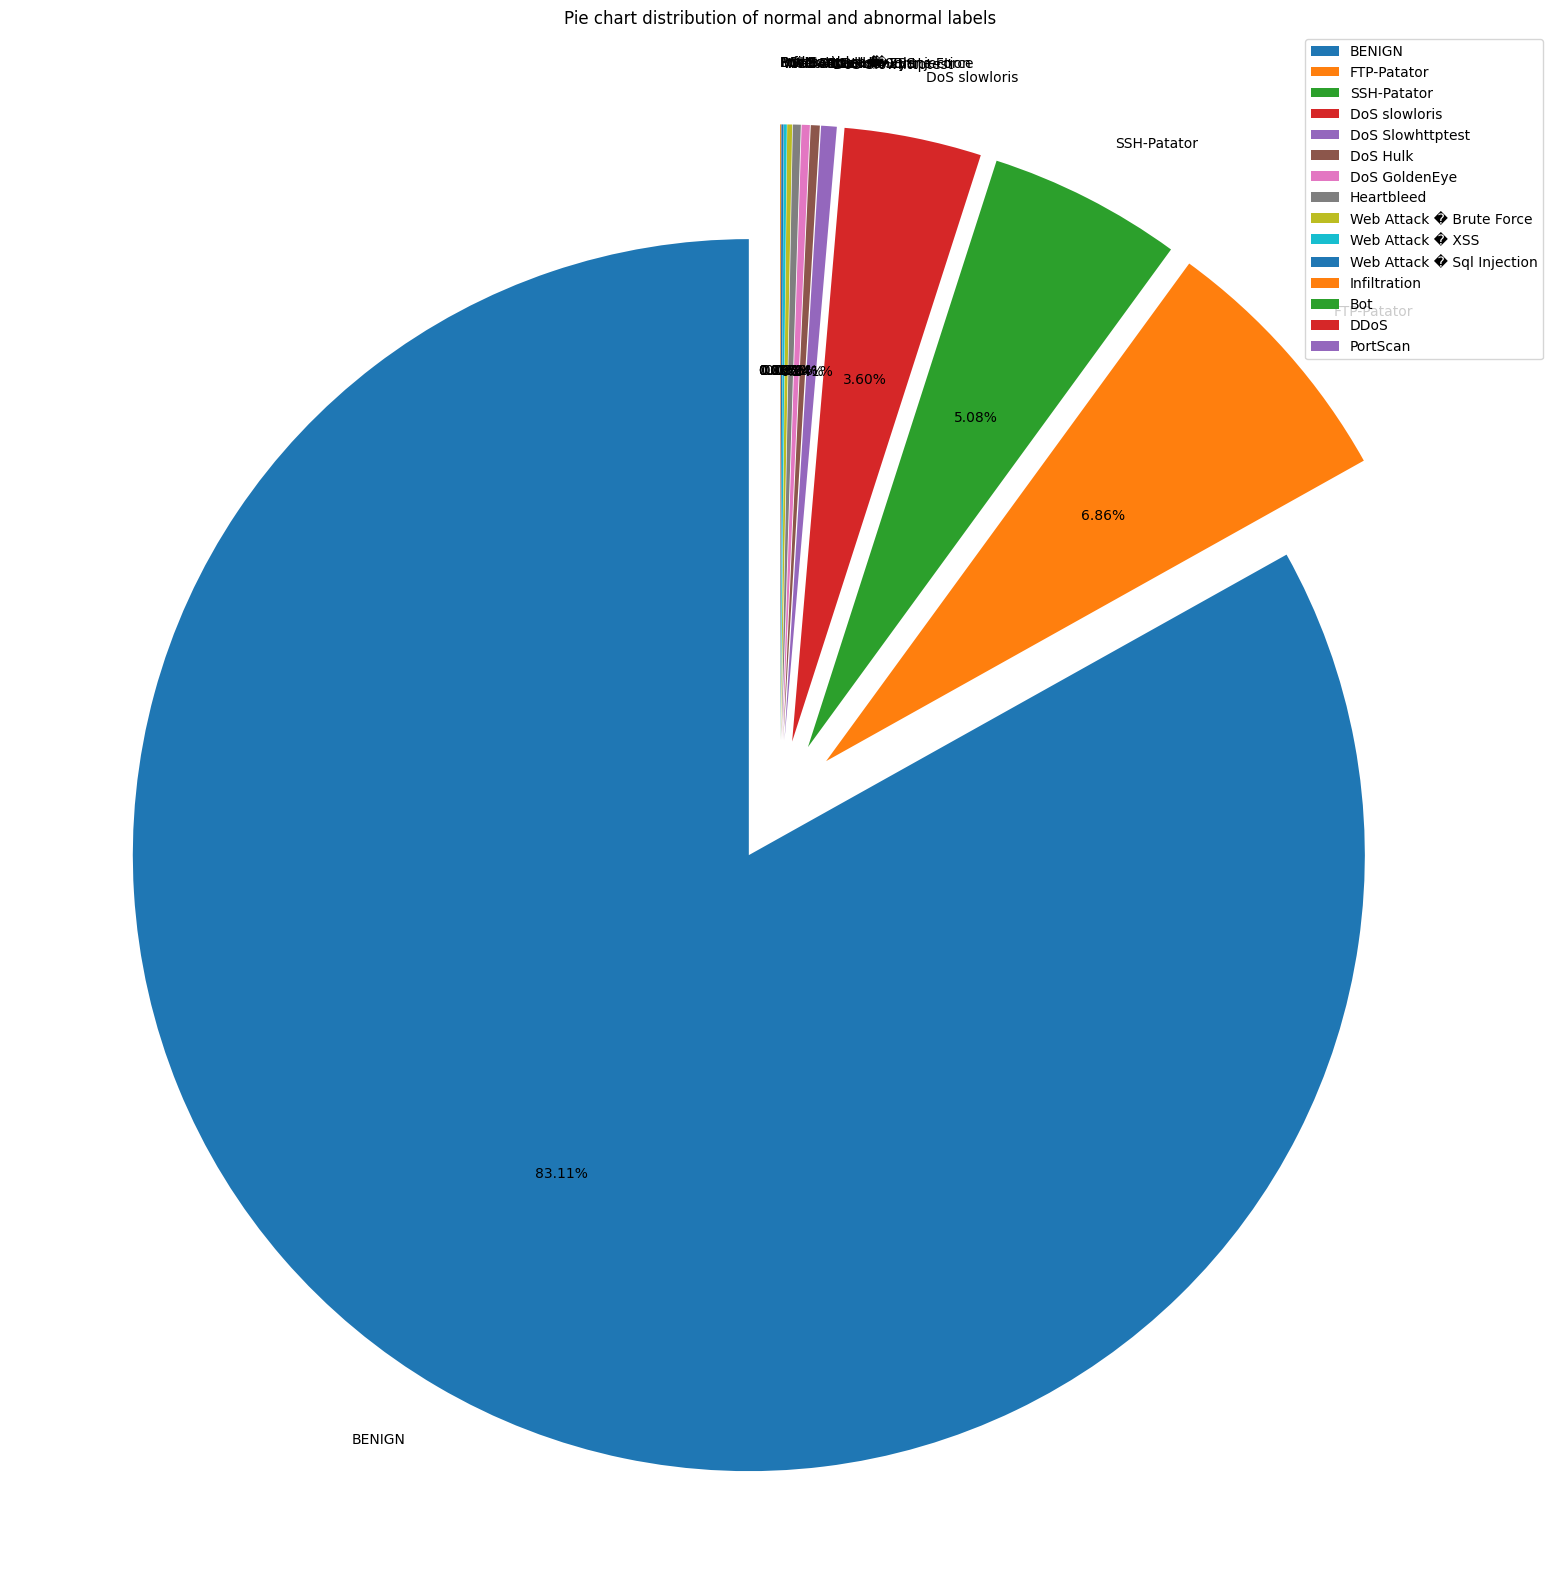

In [66]:
import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(20, 20))

# Pie chart distribution of normal and abnormal labels
labels = df[' Label'].unique()
sizes = df[' Label'].value_counts()
explode = (0.1,) * len(labels)  # Explode all slices slightly

plt.pie(sizes, labels=labels, autopct='%0.2f%%', explode=explode, startangle=90)

# Title and legend
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend(labels, loc="best")

plt.show()


In [67]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)  


In [68]:
df.shape

(2520798, 79)

In [69]:
import pandas as pd

# Assuming df is your DataFrame with the given dataset
# Create a list of classes you want to keep all records for
classes_to_keep = ['DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest',
                   'Bot', 'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration', 'Web Attack � Sql Injection', 'Heartbleed']

# Create a list of classes you want to limit to 100,000 records
classes_to_limit = ['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS']

# Filter rows for classes to keep all records
df_keep = df[df[' Label'].isin(classes_to_keep)]

# Filter rows for classes to limit to 100,000 records
df_limit = df[df[' Label'].isin(classes_to_limit)].groupby(' Label').head(50000)

# Concatenate the two DataFrames
result_df = pd.concat([df_keep, df_limit])

# Shuffle the resulting DataFrame to mix the classes
result_df = result_df.sample(frac=1, random_state=42).reset_index(drop=True)



In [22]:
result_df.shape

(234187, 79)

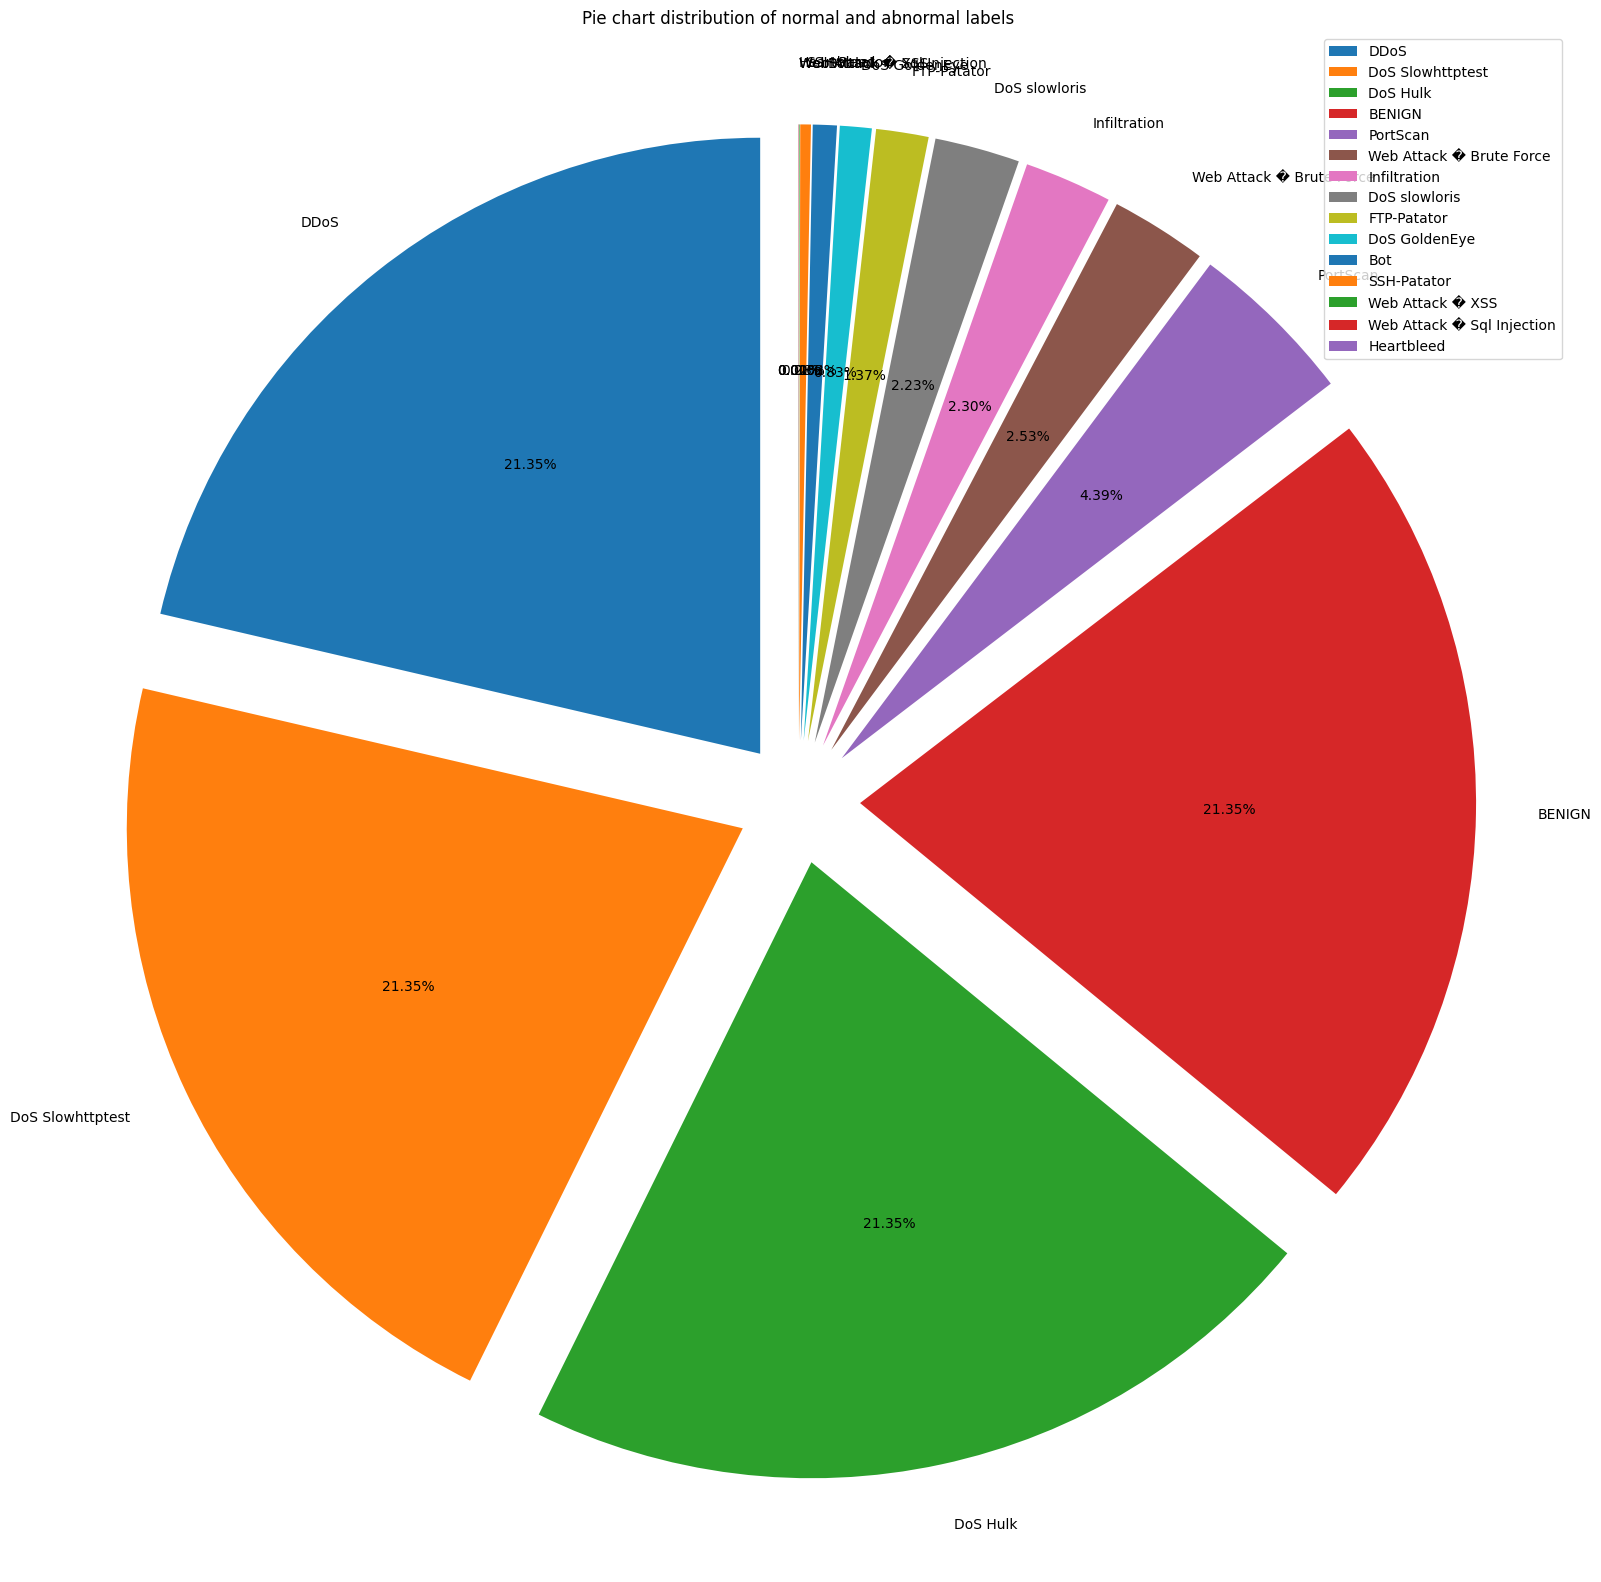

In [70]:
import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(20, 20))

# Pie chart distribution of normal and abnormal labels
labels = result_df[' Label'].unique()
sizes = result_df[' Label'].value_counts()
explode = (0.1,) * len(labels)  # Explode all slices slightly

plt.pie(sizes, labels=labels, autopct='%0.2f%%', explode=explode, startangle=90)

# Title and legend
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend(labels, loc="best")

plt.show()


In [71]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your dataframe
df_encoded = result_df.copy()

# Create a label (category) encoder objecta
le = LabelEncoder()

# Fit and transform the "Label" column, and assign the transformed values to a new column
df_encoded[' Label'] = le.fit_transform(result_df[' Label'])

# Print the mapping of original labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

# Display the modified DataFrame
print("\nEncoded DataFrame:")
df_encoded.head()


Label Mapping:
{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack � Brute Force': 12, 'Web Attack � Sql Injection': 13, 'Web Attack � XSS': 14}

Encoded DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,1730933,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,2
1,80,20997253,2,1,13,0,13,0,6.500000,9.192388,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5
2,80,97512230,7,5,397,11595,397,0,56.714286,150.051896,...,32,538.0,0.0,538,538,97500000.0,0.0,97500000,97500000,4
3,80,72239203,8,6,56,11607,20,0,7.000000,5.656854,...,20,719.0,0.0,719,719,35400000.0,35100000.0,60300000,10600000,2
4,51098,3,2,0,37,0,31,6,18.500000,17.677670,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [72]:
import joblib
# Save the LabelEncoder to a file
encoder_file_path = 'label_encoder.pkl'
joblib.dump(le, encoder_file_path)


['label_encoder.pkl']

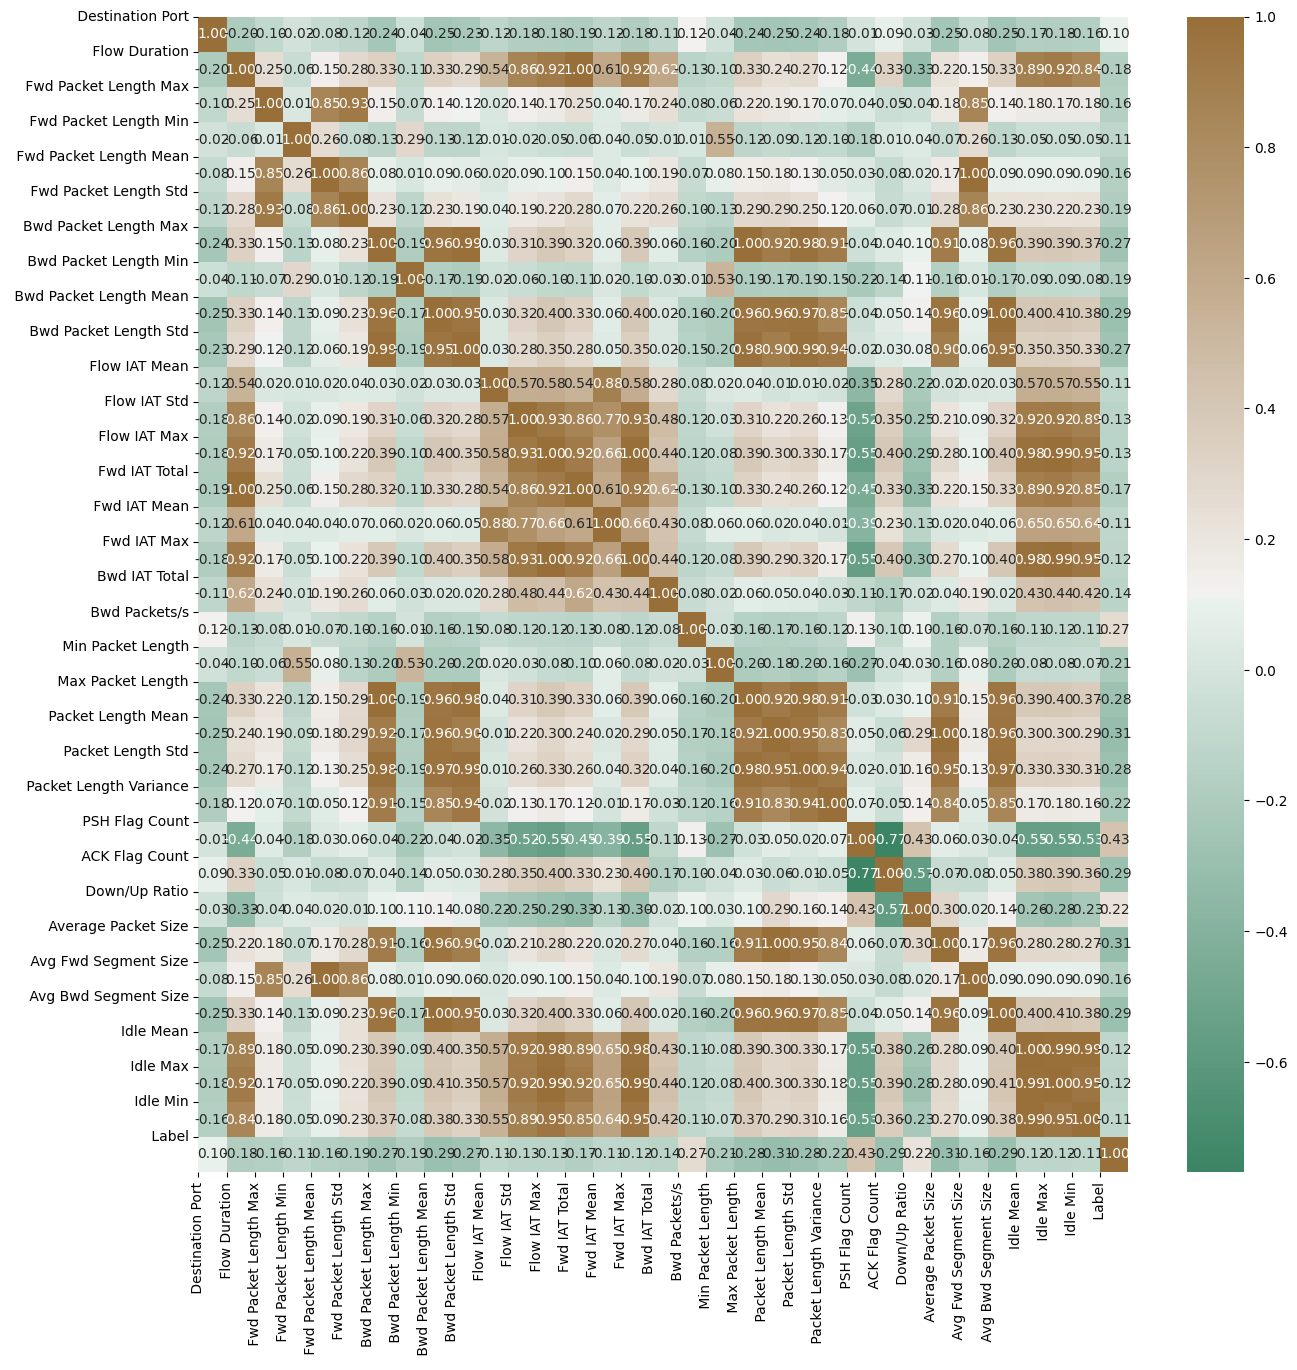

In [73]:
import seaborn as sns

# Set the correlation threshold
correlation_threshold = 0.1  # You can adjust this threshold as needed

# Calculate the correlation matrix
corr = df_encoded.corr()

# Filter columns based on correlation threshold
columns_to_include = corr.columns[abs(corr[' Label']) >= correlation_threshold]
filtered_corr = corr.loc[columns_to_include, columns_to_include]

# Plot the filtered correlation heatmap
fig, ax = plt.subplots(figsize=(15, 15))
colormap = sns.diverging_palette(150, 50, as_cmap=True)
sns.heatmap(filtered_corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.yticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.show()


In [74]:

# Split your data into X and y
X = df_encoded.drop(' Label', axis=1)
y = df_encoded[' Label']

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_features = feature_importance_df.head(20)['Feature'].tolist()

# Filter your original DataFrame to include only the top 20 features
df_top_features = df_encoded[top_features + [' Label']]

# Display the DataFrame with top features
df_top_features.head()


,Fwd Packet Length Max,Total Length of Fwd Packets,Bwd Packets/s,Subflow Fwd Bytes,Fwd Packet Length Mean,Avg Fwd Segment Size,Avg Bwd Segment Size,Flow IAT Mean,Flow Packets/s,Flow IAT Max,...,Packet Length Std,Init_Win_bytes_backward,Bwd Packet Length Std,Total Length of Bwd Packets,Fwd Packet Length Std,Subflow Bwd Bytes,Flow Duration,Subflow Fwd Packets,Packet Length Mean,Label
0,20,26,2.888616,26,8.666667,8.666667,2321.4,2.472761e+05,4.621785,1728425,...,3350.634907,229,4413.201989,11607,10.263203,11607,1730933,3,1292.555556,2
1,13,13,0.047625,13,6.500000,6.500000,0.0,1.050000e+07,0.142876,21000000,...,7.505553,235,0.000000,0,9.192388,0,20997253,2,6.500000,5
2,397,397,0.051276,397,56.714286,56.714286,2319.0,8.864748e+06,0.123061,97500000,...,2797.778452,235,4414.366206,11595,150.051896,11595,97512230,7,922.461538,4
3,20,56,0.083057,56,7.000000,7.000000,1934.5,5.556862e+06,0.193801,60300000,...,1627.461760,229,2177.344966,11607,5.656854,11607,72239203,8,777.933333,2
4,31,37,0.000000,37,18.500000,18.500000,0.0,3.000000e+00,666666.666667,3,...,14.433757,-1,0.000000,0,17.677670,0,3,2,22.666667,0


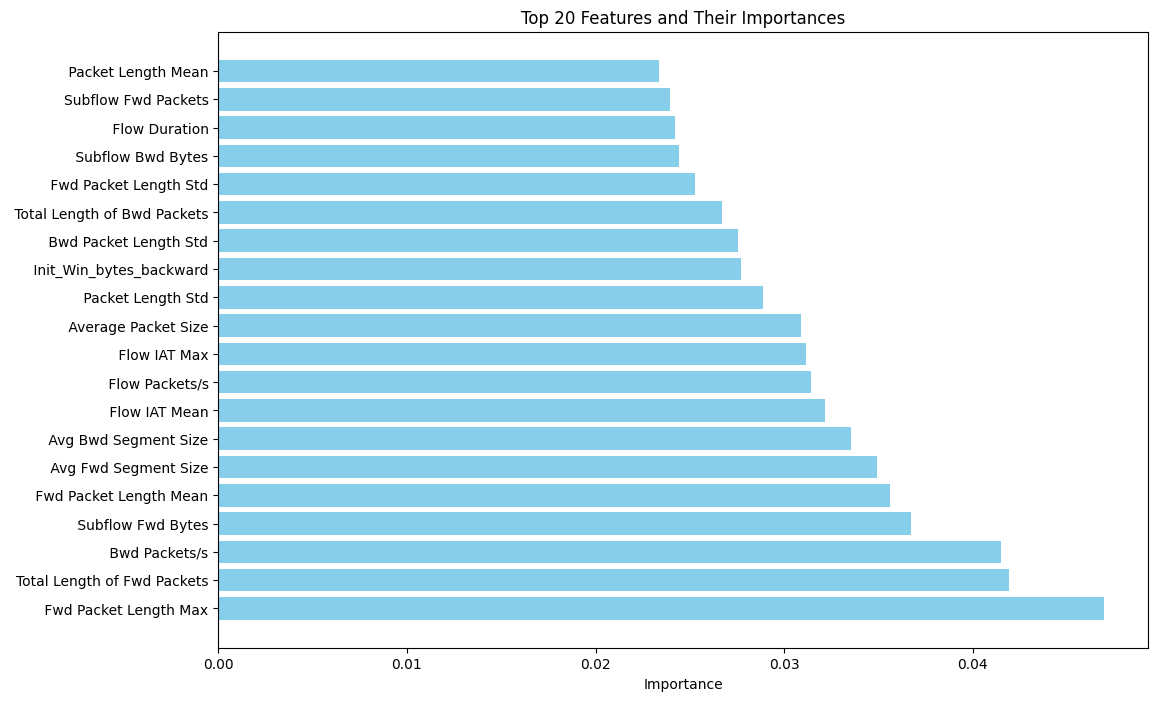

In [76]:
import matplotlib.pyplot as plt

# Create a bar plot of the top 20 features and their importances
plt.figure(figsize=(12, 8))
plt.barh(top_features, feature_importance_df.head(20)['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features and Their Importances')
plt.show()


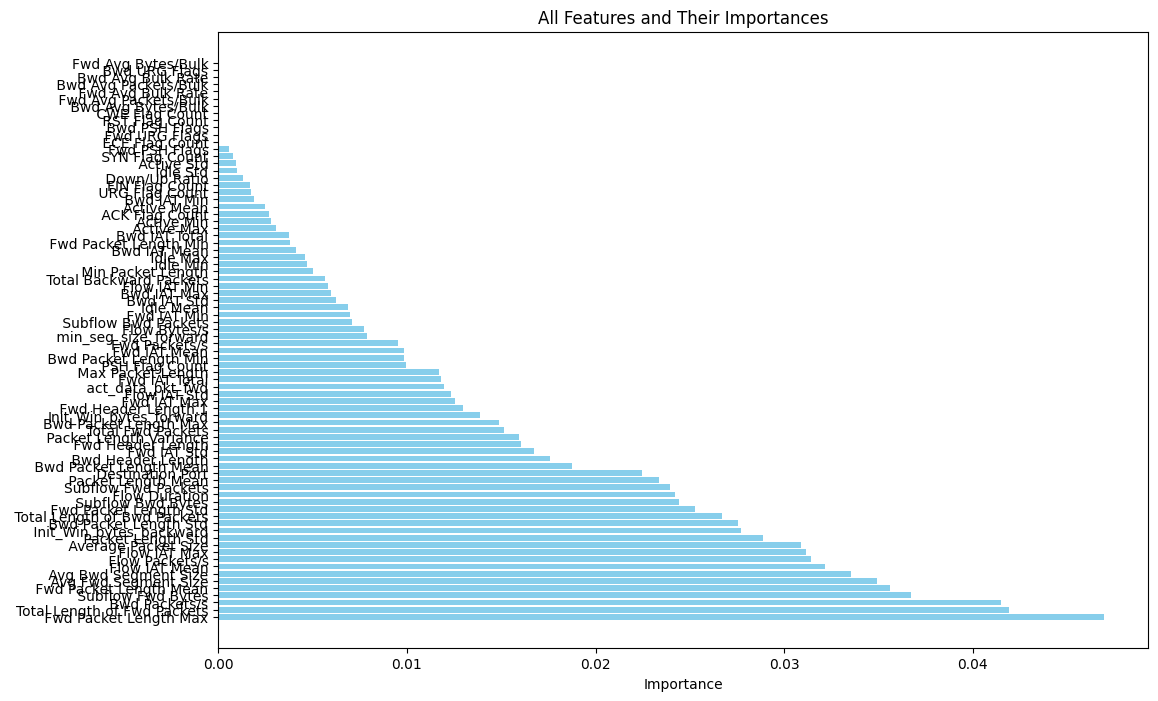

In [77]:
import matplotlib.pyplot as plt

# Assuming feature_importance_df is the DataFrame with feature importances

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of all features and their importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('All Features and Their Importances')
plt.show()


In [57]:
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234187 entries, 0 to 234186
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Fwd Packet Length Max        234187 non-null  int64  
 1   Total Length of Fwd Packets   234187 non-null  int64  
 2    Bwd Packets/s                234187 non-null  float64
 3    Subflow Fwd Bytes            234187 non-null  int64  
 4    Fwd Packet Length Mean       234187 non-null  float64
 5    Avg Fwd Segment Size         234187 non-null  float64
 6    Avg Bwd Segment Size         234187 non-null  float64
 7    Flow IAT Mean                234187 non-null  float64
 8    Flow Packets/s               234187 non-null  float64
 9    Flow IAT Max                 234187 non-null  int64  
 10   Average Packet Size          234187 non-null  float64
 11   Packet Length Std            234187 non-null  float64
 12   Init_Win_bytes_backward      234187 non-nul

In [78]:
# Assuming 'Label' is the target variable
X_top_features = df_top_features.drop(' Label', axis=1)
y_top_features = df_top_features[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y_top_features, test_size=0.2, random_state=42)


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187349 entries, 63072 to 121958
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Fwd Packet Length Max        187349 non-null  int64  
 1   Total Length of Fwd Packets   187349 non-null  int64  
 2    Bwd Packets/s                187349 non-null  float64
 3    Subflow Fwd Bytes            187349 non-null  int64  
 4    Fwd Packet Length Mean       187349 non-null  float64
 5    Avg Fwd Segment Size         187349 non-null  float64
 6    Avg Bwd Segment Size         187349 non-null  float64
 7    Flow IAT Mean                187349 non-null  float64
 8    Flow Packets/s               187349 non-null  float64
 9    Flow IAT Max                 187349 non-null  int64  
 10   Average Packet Size          187349 non-null  float64
 11   Packet Length Std            187349 non-null  float64
 12   Init_Win_bytes_backward      187349 non-null

In [69]:
X_top_features.to_csv('X_top_features.csv', index=False)

In [70]:
y_top_features.to_csv('y_top_features.csv', index=False)

In [53]:
print("Infinity values in X_train:", np.any(np.isinf(X_train)))
print("NaN values in X_train:", np.any(np.isnan(X_train)))


Infinity values in X_train: False
NaN values in X_train: False


In [38]:
# from sklearn.preprocessaing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [83]:
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [81]:
def print_all_accuracy_matric(algorithm,name):
    #computing the accuracy, f1_score, Recall, precision of the model performance
    #predicting the target value from the model for the samples
    y_train_log = algorithm.predict(X_train)
    y_test_log = algorithm.predict(X_test)

    acc_train_log = metrics.accuracy_score(y_train,y_train_log)
    acc_test_log = metrics.accuracy_score(y_test,y_test_log)
    print(name," : Accuracy on training Data: {:.3f}".format(acc_train_log))
    print(name," : Accuracy on test Data: {:.3f}".format(acc_test_log))
    print()

    f1_score_train_log = metrics.f1_score(y_train,y_train_log, average='macro')
    f1_score_test_log = metrics.f1_score(y_test,y_test_log, average='macro')
    print(name," : f1_score on training Data: {:.3f}".format(f1_score_train_log))
    print(name," : f1_score on test Data: {:.3f}".format(f1_score_test_log))
    print()

    recall_score_train_log = metrics.recall_score(y_train,y_train_log, average='macro')
    recall_score_test_log = metrics.recall_score(y_test,y_test_log, average='macro')
    print(name," : Recall on training Data: {:.3f}".format(recall_score_train_log))
    print(name," : Recall on test Data: {:.3f}".format(recall_score_test_log))
    print()

    precision_score_train_log = metrics.precision_score(y_train,y_train_log, average='macro')
    precision_score_test_log = metrics.precision_score(y_test,y_test_log, average='macro')
    print(name," : precision on training Data: {:.3f}".format(precision_score_train_log))
    print(name," : precision on test Data: {:.3f}".format(precision_score_test_log))

    print('\n\nClassification Report\n\n')
    print(metrics.classification_report(y_test, y_test_log))
    print('\n\n')


# Machine Learning


# 1. DecisionTreeClassifier

In [84]:


from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
clfd.fit(X_train, y_train)
print_all_accuracy_matric(clfd,'DecisionTreeClassifier ')

# Save the model using joblib
joblib.dump(clfd, 'DecisionTreeClassifier.joblib')


DecisionTreeClassifier   : Accuracy on training Data: 0.912
DecisionTreeClassifier   : Accuracy on test Data: 0.910

DecisionTreeClassifier   : f1_score on training Data: 0.432
DecisionTreeClassifier   : f1_score on test Data: 0.430

DecisionTreeClassifier   : Recall on training Data: 0.435
DecisionTreeClassifier   : Recall on test Data: 0.434

DecisionTreeClassifier   : precision on training Data: 0.435
DecisionTreeClassifier   : precision on test Data: 0.434


Classification Report


              precision    recall  f1-score   support

           0       0.78      0.97      0.86      9962
           1       0.00      0.00      0.00       396
           2       1.00      1.00      1.00      9981
           3       0.96      0.64      0.77      2110
           4       1.00      0.96      0.98     10067
           5       0.47      0.58      0.52      1015
           6       0.55      0.41      0.47      1118
           7       0.75      0.97      0.85      1194
           8       0.0

['DecisionTreeClassifier.joblib']

# 2. SVM

In [ ]:
# from sklearn.svm import SVC

# # Create the SVM model
# svm_model = SVC(kernel='linear', C=1.0)

# # Fit the model on the training data
# svm_model.fit(X_train, y_train)

# print_all_accuracy_matric(svm_model,'SVM ')

# # Save the model using joblib
# joblib.dump(model, 'SVM.joblib')


# 2. RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( random_state=42)
rf_clf.fit(X_train, y_train)
print_all_accuracy_matric(rf_clf,'RandomForestClassifier ')

# Save the model using joblib
joblib.dump(rf_clf, 'RandomForestClassifier.joblib')


RandomForestClassifier   : Accuracy on training Data: 1.000
RandomForestClassifier   : Accuracy on test Data: 0.993

RandomForestClassifier   : f1_score on training Data: 1.000
RandomForestClassifier   : f1_score on test Data: 0.887

RandomForestClassifier   : Recall on training Data: 1.000
RandomForestClassifier   : Recall on test Data: 0.881

RandomForestClassifier   : precision on training Data: 1.000
RandomForestClassifier   : precision on test Data: 0.902


Classification Report


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9966
           1       0.89      0.87      0.88       411
           2       1.00      1.00      1.00      9981
           3       1.00      1.00      1.00      2069
           4       1.00      1.00      1.00      9896
           5       1.00      0.99      0.99      1079
           6       1.00      1.00      1.00      1067
           7       1.00      1.00      1.00      1217
           8       1.0

['RandomForestClassifier.joblib']

# 3. KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors as needed
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_clf.predict(X_test)

print_all_accuracy_matric(knn_clf,'KNeighborsClassifier ')

# Save the model using joblib
joblib.dump(rf_clf, 'KNeighborsClassifier.joblib')


KNeighborsClassifier   : Accuracy on training Data: 0.987
KNeighborsClassifier   : Accuracy on test Data: 0.977

KNeighborsClassifier   : f1_score on training Data: 0.870
KNeighborsClassifier   : f1_score on test Data: 0.841

KNeighborsClassifier   : Recall on training Data: 0.846
KNeighborsClassifier   : Recall on test Data: 0.821

KNeighborsClassifier   : precision on training Data: 0.953
KNeighborsClassifier   : precision on test Data: 0.909


Classification Report


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9966
           1       0.78      0.79      0.78       411
           2       0.98      0.99      0.99      9981
           3       0.94      0.95      0.95      2069
           4       0.99      0.99      0.99      9896
           5       0.97      0.98      0.98      1079
           6       0.96      0.96      0.96      1067
           7       0.99      0.98      0.99      1217
           8       1.00      1.00     

['KNeighborsClassifier.joblib']

In [59]:
# # Gradient Boosting Classifier Model
# from sklearn.ensemble import GradientBoostingClassifier


# gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# # fit the model
# gbc.fit(X_train,y_train)

# print_all_accuracy_matric(gbc,'Gradient Boosting Classifier')
# # Save the model using joblib
# joblib.dump(gbc, 'GradientBoostingClassifier.joblib')


In [ ]:
# 

# 4. Naive Bayes

In [60]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb=  GaussianNB()

# fit the model
nb.fit(X_train,y_train)
print_all_accuracy_matric(nb,'Naive Bayes')

joblib.dump(nb, 'GaussianNB.joblib')


Naive Bayes  : Accuracy on training Data: 0.396
Naive Bayes  : Accuracy on test Data: 0.396

Naive Bayes  : f1_score on training Data: 0.313
Naive Bayes  : f1_score on test Data: 0.304

Naive Bayes  : Recall on training Data: 0.467
Naive Bayes  : Recall on test Data: 0.485

Naive Bayes  : precision on training Data: 0.377
Naive Bayes  : precision on test Data: 0.372


Classification Report


              precision    recall  f1-score   support

           0       0.86      0.05      0.10      9966
           1       0.25      0.03      0.05       411
           2       0.96      0.60      0.74      9981
           3       0.28      0.73      0.41      2069
           4       0.81      0.69      0.74      9896
           5       0.22      0.01      0.02      1079
           6       0.27      0.59      0.37      1067
           7       0.06      1.00      0.12      1217
           8       0.14      1.00      0.25         1
           9       0.12      0.67      0.20         6
          

['GaussianNB.joblib']

In [61]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


# 4. CatBoostClassifier

In [62]:
import catboost
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=6)
catboost_model.fit(X_train, y_train)

print_all_accuracy_matric(catboost_model,'CatBoostClassifier')
joblib.dump(nb, 'CatBoostClassifier.joblib')

0:	learn: 1.6443732	total: 726ms	remaining: 6.54s
1:	learn: 1.3238078	total: 1.32s	remaining: 5.27s
2:	learn: 1.1263643	total: 1.9s	remaining: 4.44s
3:	learn: 0.9738015	total: 2.49s	remaining: 3.73s
4:	learn: 0.8558586	total: 3.06s	remaining: 3.06s
5:	learn: 0.7585313	total: 3.63s	remaining: 2.42s
6:	learn: 0.6717927	total: 4.21s	remaining: 1.8s
7:	learn: 0.6049077	total: 4.81s	remaining: 1.2s
8:	learn: 0.5464304	total: 5.42s	remaining: 602ms
9:	learn: 0.4965787	total: 5.99s	remaining: 0us
CatBoostClassifier  : Accuracy on training Data: 0.959
CatBoostClassifier  : Accuracy on test Data: 0.959

CatBoostClassifier  : f1_score on training Data: 0.640
CatBoostClassifier  : f1_score on test Data: 0.637

CatBoostClassifier  : Recall on training Data: 0.630
CatBoostClassifier  : Recall on test Data: 0.628

CatBoostClassifier  : precision on training Data: 0.673
CatBoostClassifier  : precision on test Data: 0.670


Classification Report


              precision    recall  f1-score   support


['CatBoostClassifier.joblib']

# 6. LogisticRegression

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

print_all_accuracy_matric(logreg_model,'LogisticRegression')
joblib.dump(nb, 'LogisticRegression.joblib')

# Stacking Ensemble: Stacking is a popular ensemble method that combines multiple base models using a meta-model. In stacking, the output of each base model is used as input to the meta-model, which then makes the final prediction. Stacking can help improve the performance of the model by combining the strengths of multiple models. 

# 7. Hybrid Model

In [64]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# Import or define print_all_accuracy_matric function

# Define the meta model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the base models
logreg_model = LogisticRegression()
clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=3)
catboost_model = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=6)

# Define the stacking ensemble model
stacked_model = StackingClassifier(
    estimators=[('DecisionTree', clfd), ('LogisticRegression', logreg_model), ('KNN', knn_clf), ('CatBoostClassifier', catboost_model)],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking ensemble model
stacked_model.fit(X_train, y_train)

# Evaluate the performance of the stacking ensemble model
print_all_accuracy_matric(stacked_model, 'Stacking Ensemble')


0:	learn: 1.6443732	total: 590ms	remaining: 5.31s
1:	learn: 1.3238078	total: 1.16s	remaining: 4.66s
2:	learn: 1.1263643	total: 1.74s	remaining: 4.05s
3:	learn: 0.9738015	total: 2.31s	remaining: 3.46s
4:	learn: 0.8558586	total: 2.88s	remaining: 2.88s
5:	learn: 0.7585313	total: 3.72s	remaining: 2.48s
6:	learn: 0.6717927	total: 4.48s	remaining: 1.92s
7:	learn: 0.6049077	total: 5.17s	remaining: 1.29s
8:	learn: 0.5464304	total: 5.76s	remaining: 640ms
9:	learn: 0.4965787	total: 6.35s	remaining: 0us
0:	learn: 1.6654589	total: 488ms	remaining: 4.39s
1:	learn: 1.3425945	total: 971ms	remaining: 3.88s
2:	learn: 1.1306151	total: 1.44s	remaining: 3.35s
3:	learn: 0.9704302	total: 1.9s	remaining: 2.85s
4:	learn: 0.8510004	total: 2.37s	remaining: 2.37s
5:	learn: 0.7488564	total: 2.83s	remaining: 1.89s
6:	learn: 0.6715370	total: 3.3s	remaining: 1.41s
7:	learn: 0.6045156	total: 3.77s	remaining: 942ms
8:	learn: 0.5467903	total: 4.23s	remaining: 470ms
9:	learn: 0.4958995	total: 4.76s	remaining: 0us
0:	lea

In [65]:
joblib.dump(stacked_model, 'StackingEnsemble.joblib')

['StackingEnsemble.joblib']

In [66]:

# Later, when you want to make predictions
# Load the model from the file
loaded_model = joblib.load('StackingEnsemble.joblib')

# Saving Data for testing

In [67]:
print(X_top_features.iloc[0])
print('\n\noutput:',y_top_features.iloc[0])

 Fwd Packet Length Mean         8.666667e+00
 Fwd Packet Length Max          2.000000e+01
 Avg Fwd Segment Size           8.666667e+00
 Subflow Fwd Bytes              2.600000e+01
Total Length of Fwd Packets     2.600000e+01
 Flow IAT Max                   1.728425e+06
 Average Packet Size            1.454125e+03
 Bwd Packet Length Std          4.413202e+03
 Flow Duration                  1.730933e+06
 Avg Bwd Segment Size           2.321400e+03
 Bwd Packets/s                  2.888616e+00
 Packet Length Mean             1.292556e+03
Init_Win_bytes_forward          8.192000e+03
 Init_Win_bytes_backward        2.290000e+02
 Packet Length Std              3.350635e+03
 Fwd IAT Max                    2.039000e+03
 Fwd Packet Length Std          1.026320e+01
 Packet Length Variance         1.120000e+07
 Total Length of Bwd Packets    1.160700e+04
 Flow Packets/s                 4.621785e+00
Name: 0, dtype: float64


output: 2


In [68]:
# Make predictions using the loaded model
# Create a new DataFrame with the first row
first_row_df = X_top_features.head(1)

prediction = loaded_model.predict(first_row_df)

# Print the prediction
print(f"The predicted class is: {prediction[0]}")
 

The predicted class is: 2


In [69]:
print(X_top_features.iloc[1])
print('\n\noutput:',y_top_features.iloc[1])

 Fwd Packet Length Mean         0.000000e+00
 Fwd Packet Length Max          0.000000e+00
 Avg Fwd Segment Size           0.000000e+00
 Subflow Fwd Bytes              0.000000e+00
Total Length of Fwd Packets     0.000000e+00
 Flow IAT Max                   2.003984e+06
 Average Packet Size            0.000000e+00
 Bwd Packet Length Std          0.000000e+00
 Flow Duration                  3.003776e+06
 Avg Bwd Segment Size           0.000000e+00
 Bwd Packets/s                  0.000000e+00
 Packet Length Mean             0.000000e+00
Init_Win_bytes_forward          2.920000e+04
 Init_Win_bytes_backward       -1.000000e+00
 Packet Length Std              0.000000e+00
 Fwd IAT Max                    2.003984e+06
 Fwd Packet Length Std          0.000000e+00
 Packet Length Variance         0.000000e+00
 Total Length of Bwd Packets    0.000000e+00
 Flow Packets/s                 9.987429e-01
Name: 1, dtype: float64


output: 6


In [70]:
# Make predictions using the loaded model
# Create a new DataFrame with the first row
first_row_df = X_top_features.head(2).tail(1)

prediction = loaded_model.predict(first_row_df)

# Print the prediction
print(f"The predicted class is: {prediction[0]}")
 

The predicted class is: 6


In [71]:
first_row_df.to_csv('first_row_df.csv')

In [72]:
first_row_df

,Fwd Packet Length Mean,Fwd Packet Length Max,Avg Fwd Segment Size,Subflow Fwd Bytes,Total Length of Fwd Packets,Flow IAT Max,Average Packet Size,Bwd Packet Length Std,Flow Duration,Avg Bwd Segment Size,Bwd Packets/s,Packet Length Mean,Init_Win_bytes_forward,Init_Win_bytes_backward,Packet Length Std,Fwd IAT Max,Fwd Packet Length Std,Packet Length Variance,Total Length of Bwd Packets,Flow Packets/s
1,0.0,0,0.0,0,0,2003984,0.0,0.0,3003776,0.0,0.0,0.0,29200,-1,0.0,2003984,0.0,0.0,0,0.998743


In [73]:
# Create a new DataFrame with the first row
first_row_df = X_top_features.head(10)
first_row_df.to_csv("first_x_10_row_df.csv", index=False)
# Create a new DataFrame with the first row
first_row_df = y_top_features.head(10)
first_row_df.to_csv("first_y_10_row_df.csv", index=False)


In [74]:
# Create a new DataFrame with the first row
first_row_df = X_top_features.head(-10)
first_row_df.to_csv("first_x_10_row_df_1.csv", index=False)
# Create a new DataFrame with the first row
first_row_df = y_top_features.head(-10)
first_row_df.to_csv("first_y_10_row_df_1.csv", index=False)


In [77]:
# Assuming X_top_features and y_top_features are your DataFrames
middle_rows_X = X_top_features.loc[15:24]  # Select rows 16 to 25 (10 rows)
middle_rows_y = y_top_features.loc[15:24]

# Save middle rows to CSV files
middle_rows_X.to_csv("middle_x_10_rows.csv", index=False)
middle_rows_y.to_csv("middle_y_10_rows.csv", index=False)


In [79]:
# Create a new DataFrame with the first row
first_row_df = X_top_features.head(1)
first_row_df.to_csv("first_x_row_df.csv", index=False)
# Create a new DataFrame with the first row
first_row_df = y_top_features.head(1)
first_row_df.to_csv("first_y_row_df.csv", index=False)


In [81]:
# Assuming X_top_features and y_top_features are your DataFrames
last_rows_X = X_top_features.tail(10)
last_rows_y = y_top_features.tail(10)

# Save last rows to CSV files
last_rows_X.to_csv("last_x_10_rows.csv", index=False)
last_rows_y.to_csv("last_y_10_rows.csv", index=False)


# Live Testing

In [83]:
## import joblib
import pandas as pd

# Load the model from the file
model_filename = 'StackingEnsemble.joblib'
loaded_model = joblib.load(model_filename)

# Define the order and types of features manually
feature_order = [
    ' Fwd Packet Length Mean',
    ' Fwd Packet Length Max',
    ' Avg Fwd Segment Size',
    ' Subflow Fwd Bytes',
    'Total Length of Fwd Packets',
    ' Flow IAT Max',
    ' Average Packet Size',
    ' Bwd Packet Length Std',
    ' Flow Duration',
    ' Avg Bwd Segment Size',
    ' Bwd Packets/s', 
    ' Packet Length Mean',
    'Init_Win_bytes_forward',
    ' Init_Win_bytes_backward',
    ' Packet Length Std',
    ' Fwd IAT Max',
    ' Fwd Packet Length Std',
    ' Packet Length Variance',
    ' Total Length of Bwd Packets',
    ' Flow Packets/s'
    
]

# Function to take user input and make predictions
def make_prediction():
    # Prompt the user for input for each feature
    user_input = {}
    for column in feature_order:
        value = input(f"Enter value for {column}: ")
        # Convert the input to the appropriate data type
        user_input[column] = float(value) if 'float' in str(df.dtypes[column]) else int(value)

    # Create a DataFrame with the user input
    user_data = pd.DataFrame([user_input])

    # Make predictions using the loaded model
    prediction = loaded_model.predict(user_data)

    # Print the prediction
    print(f"The predicted class is: {prediction[0]}")

# Call the function to make predictions based on user input
make_prediction()


Enter value for  Fwd Packet Length Mean:  3.4
Enter value for  Fwd Packet Length Max:  3
Enter value for  Avg Fwd Segment Size:  6
Enter value for  Subflow Fwd Bytes:  2
Enter value for Total Length of Fwd Packets:  4
Enter value for  Flow IAT Max:  8
Enter value for  Average Packet Size:  6
Enter value for  Bwd Packet Length Std:  4
Enter value for  Flow Duration:  2
Enter value for  Avg Bwd Segment Size:  3
Enter value for  Bwd Packets/s:  4
Enter value for  Packet Length Mean:  5
Enter value for Init_Win_bytes_forward:  8
Enter value for  Init_Win_bytes_backward:  7
Enter value for  Packet Length Std:  5
Enter value for  Fwd IAT Max:  2
Enter value for  Fwd Packet Length Std:  3
Enter value for  Packet Length Variance:  4
Enter value for  Total Length of Bwd Packets:  6
Enter value for  Flow Packets/s:  8


The predicted class is: 0


# Deep Learning

In [84]:
from keras.layers import Dense
from keras import regularizers
from sklearn import metrics
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# create X and Y datasets for training
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras import regularizers
from keras.layers import Dense, GRU, Reshape
from keras.layers import Dropout
import numpy as np
from keras.layers import Dense, LSTM, Reshape
# Importing the necessary libraries
# numpy, pandas, matploytlib, sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle # Machine
import numpy as np  # Matrix Calac
import pandas as pd # Loading
import seaborn as sns # Plotting
import matplotlib.pyplot as plt # Plotting
from sklearn.preprocessing import LabelEncoder, StandardScaler # Machine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [89]:
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(187349, 15)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [90]:
def print_all_accuracy_matric(y_true, y_pred, name):
    acc_train_log = metrics.accuracy_score(y_true, y_pred)
    print(name, ": Accuracy: {:.3f}".format(acc_train_log))
    print()

    f1_score_train_log = metrics.f1_score(y_true, y_pred, average='macro')
    print(name, ": F1-score: {:.3f}".format(f1_score_train_log))
    print()

    recall_score_train_log = metrics.recall_score(y_true, y_pred, average='macro')
    print(name, ": Recall: {:.3f}".format(recall_score_train_log))
    print()

    precision_score_train_log = metrics.precision_score(y_true, y_pred, average='macro')
    print(name, ": Precision: {:.3f}".format(precision_score_train_log))

    print('\n\nClassification Report\n\n')
    print(metrics.classification_report(y_true, y_pred))
    print('\n\n')

# 1. Neural Network

In [95]:

# define a function to build the keras model
def create_nn_model():
    # create model
    model = Sequential()
    model.add(Dense(84, input_dim=20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(70, kernel_initializer='normal', kernel_regularizer=regularizers.l2(), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(56, kernel_initializer='normal', kernel_regularizer=regularizers.l2(), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(42, kernel_initializer='normal', kernel_regularizer=regularizers.l2(), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(15, kernel_initializer='normal', kernel_regularizer=regularizers.l2(), activation='relu'))
    model.add(Dropout(0.25))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

nn_model = create_nn_model()
print(nn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 84)                1764      
                                                                 
 dropout_10 (Dropout)        (None, 84)                0         
                                                                 
 dense_11 (Dense)            (None, 70)                5950      
                                                                 
 dropout_11 (Dropout)        (None, 70)                0         
                                                                 
 dense_12 (Dense)            (None, 56)                3976      
                                                                 
 dropout_12 (Dropout)        (None, 56)                0         
                                                                 
 dense_13 (Dense)            (None, 42)               

In [97]:
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='nn_best_model.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min',
                             verbose=1)

nn_history = nn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=20, batch_size=128,
                                                       callbacks=[checkpoint])

Epoch 1/20
1449/1464 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1168
Epoch 1: val_loss did not improve from inf
1464/1464 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.2128
Epoch 2/20
1457/1464 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1162
Epoch 2: val_loss did not improve from inf
1464/1464 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1163 - val_loss: nan - val_accuracy: 0.2128
Epoch 3/20
1460/1464 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1156
Epoch 3: val_loss did not improve from inf
1464/1464 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1157 - val_loss: nan - val_accuracy: 0.2128
Epoch 4/20
1463/1464 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.1155
Epoch 4: val_loss did not improve from inf
1464/1464 [==============================] - 5s 4ms/step - loss: na

# Accuracy with test data

In [98]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
# Obtain predictions on the test data
y_pred = nn_model.predict( X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)

# Call the function to print accuracy metrics
print_all_accuracy_matric(y_true_labels, y_pred_labels, "NN Model")

1464/1464 [==============================] - 2s 1ms/step
NN Model : Accuracy: 0.213

NN Model : F1-score: 0.023

NN Model : Recall: 0.067

NN Model : Precision: 0.014


Classification Report


              precision    recall  f1-score   support

           0       0.21      1.00      0.35      9966
           1       0.00      0.00      0.00       411
           2       0.00      0.00      0.00      9981
           3       0.00      0.00      0.00      2069
           4       0.00      0.00      0.00      9896
           5       0.00      0.00      0.00      1079
           6       0.00      0.00      0.00      1067
           7       0.00      0.00      0.00      1217
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00     10063
          11       0.00      0.00      0.00       666
          12       0.00      0.00      0.00       282
          13       0.00      0.00      0.00       

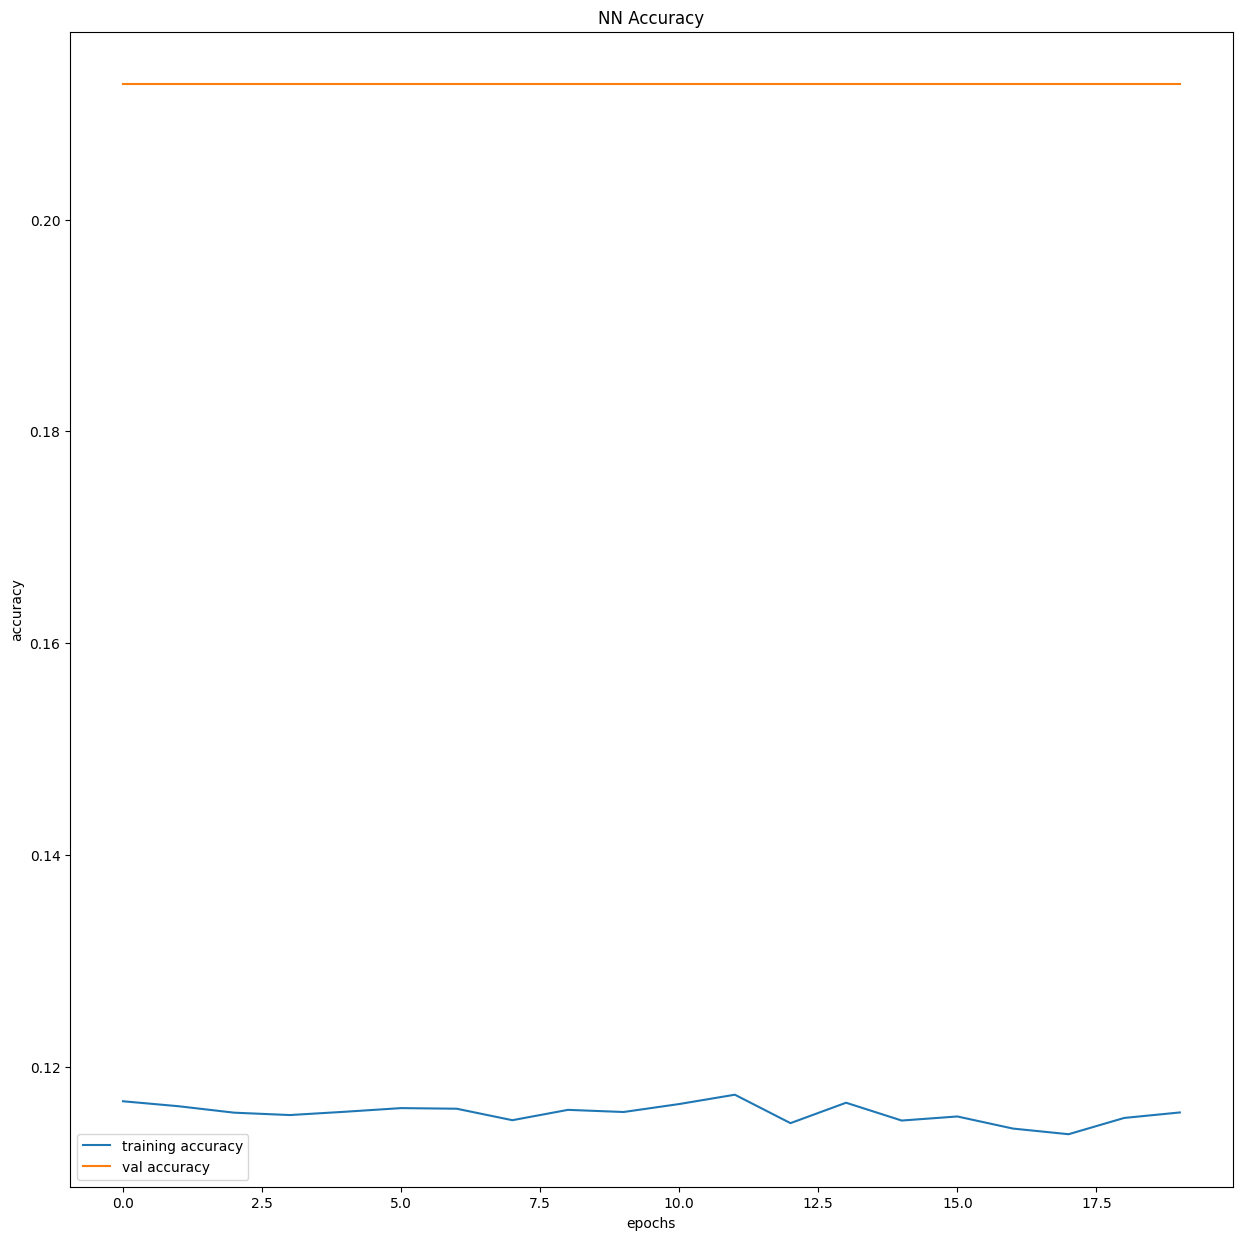

In [100]:
# accuracy 
# plt.figure(0)
plt.plot(nn_history.history['accuracy'], label='training accuracy')
plt.plot(nn_history.history['val_accuracy'], label='val accuracy')
plt.title('NN Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 2. LSTM Algorithm

In [8]:
# define a function to build the keras model
def create_lstm_model():
    # create model
    model = Sequential()
    model.add(Dense(84, input_dim=20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(70, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    
    
    # Reshape the output of the previous dense layer to match the LSTM input shape
    model.add(Reshape((1, -1)))
    
    # Add LSTM layer
    model.add(LSTM(50))  # Adjust the number of units as needed
    
    model.add(Dense(56, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(42, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(28, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(15, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
print(lstm_model.summary())

NameError: name 'Sequential' is not defined

In [104]:
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='lstm_best_model.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min',
                             verbose=1)

lstm_history = lstm_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=20, batch_size=256,
                                                       callbacks=[checkpoint])

Epoch 1/20
731/732 [============================>.] - ETA: 0s - loss: 1.6805 - accuracy: 0.3862
Epoch 1: val_loss improved from inf to 1.44804, saving model to lstm_best_model.h5
732/732 [==============================] - 10s 10ms/step - loss: 1.6803 - accuracy: 0.3863 - val_loss: 1.4480 - val_accuracy: 0.5357
Epoch 2/20
726/732 [============================>.] - ETA: 0s - loss: 1.5197 - accuracy: 0.4358
Epoch 2: val_loss improved from 1.44804 to 1.41541, saving model to lstm_best_model.h5
732/732 [==============================] - 7s 10ms/step - loss: 1.5194 - accuracy: 0.4360 - val_loss: 1.4154 - val_accuracy: 0.4776
Epoch 3/20
731/732 [============================>.] - ETA: 0s - loss: 1.4557 - accuracy: 0.4472
Epoch 3: val_loss improved from 1.41541 to 1.40168, saving model to lstm_best_model.h5
732/732 [==============================] - 7s 10ms/step - loss: 1.4558 - accuracy: 0.4472 - val_loss: 1.4017 - val_accuracy: 0.4624
Epoch 4/20
728/732 [============================>.] - ETA:

1464/1464 [==============================] - 4s 2ms/step
LSTM  30.57560100772877  % Accuracy


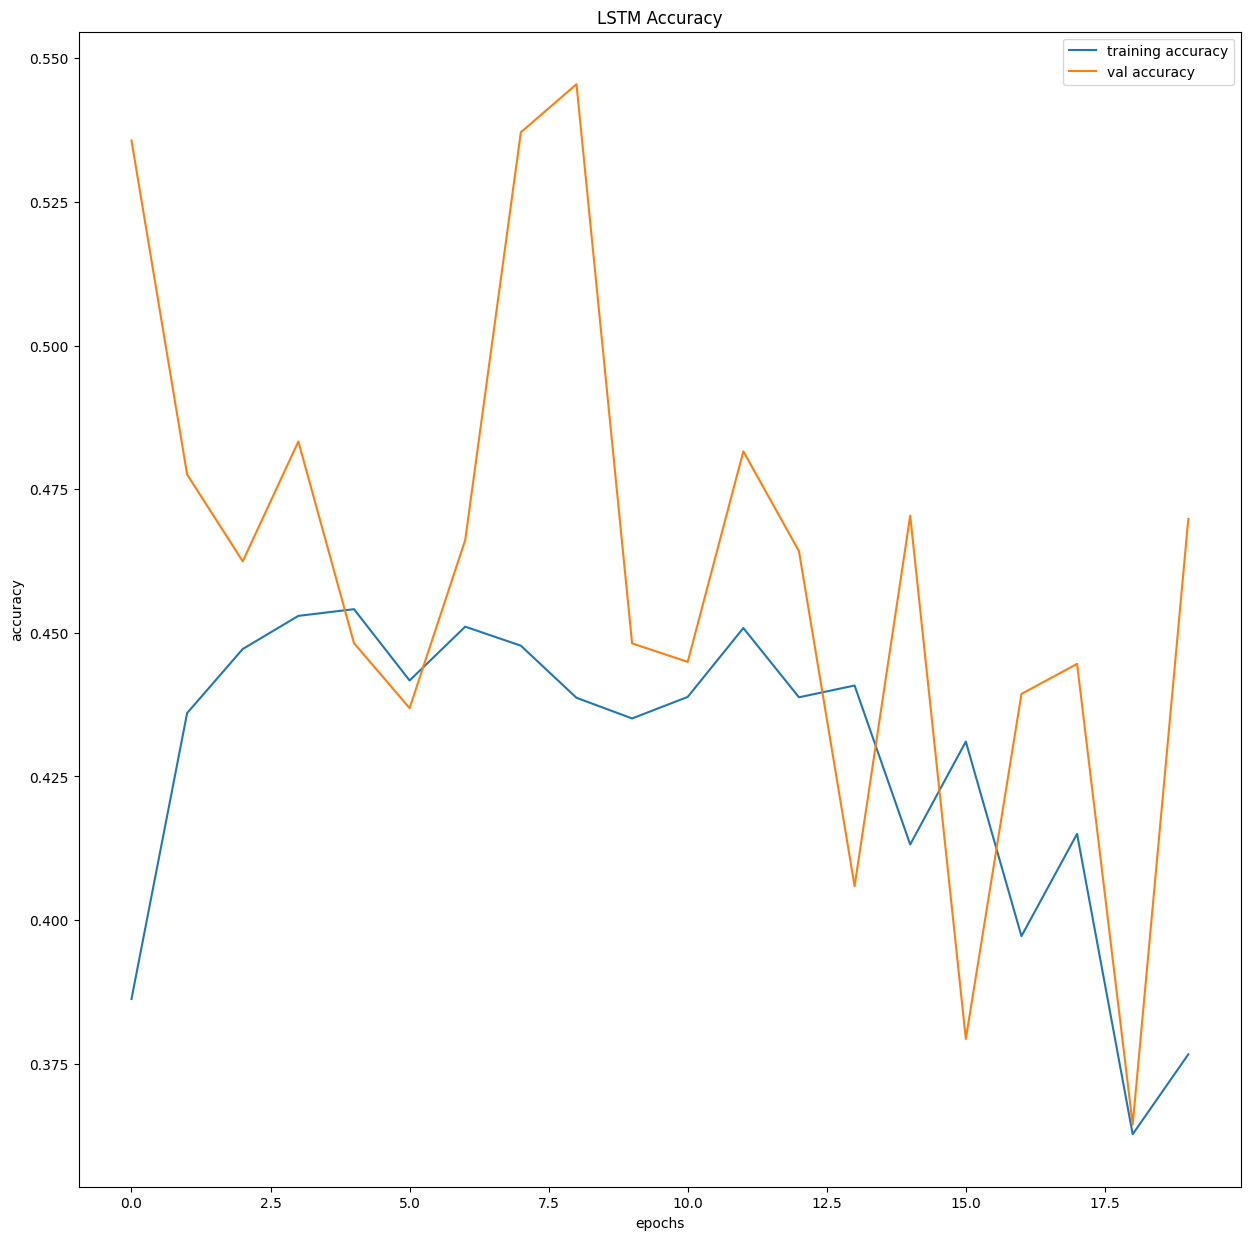

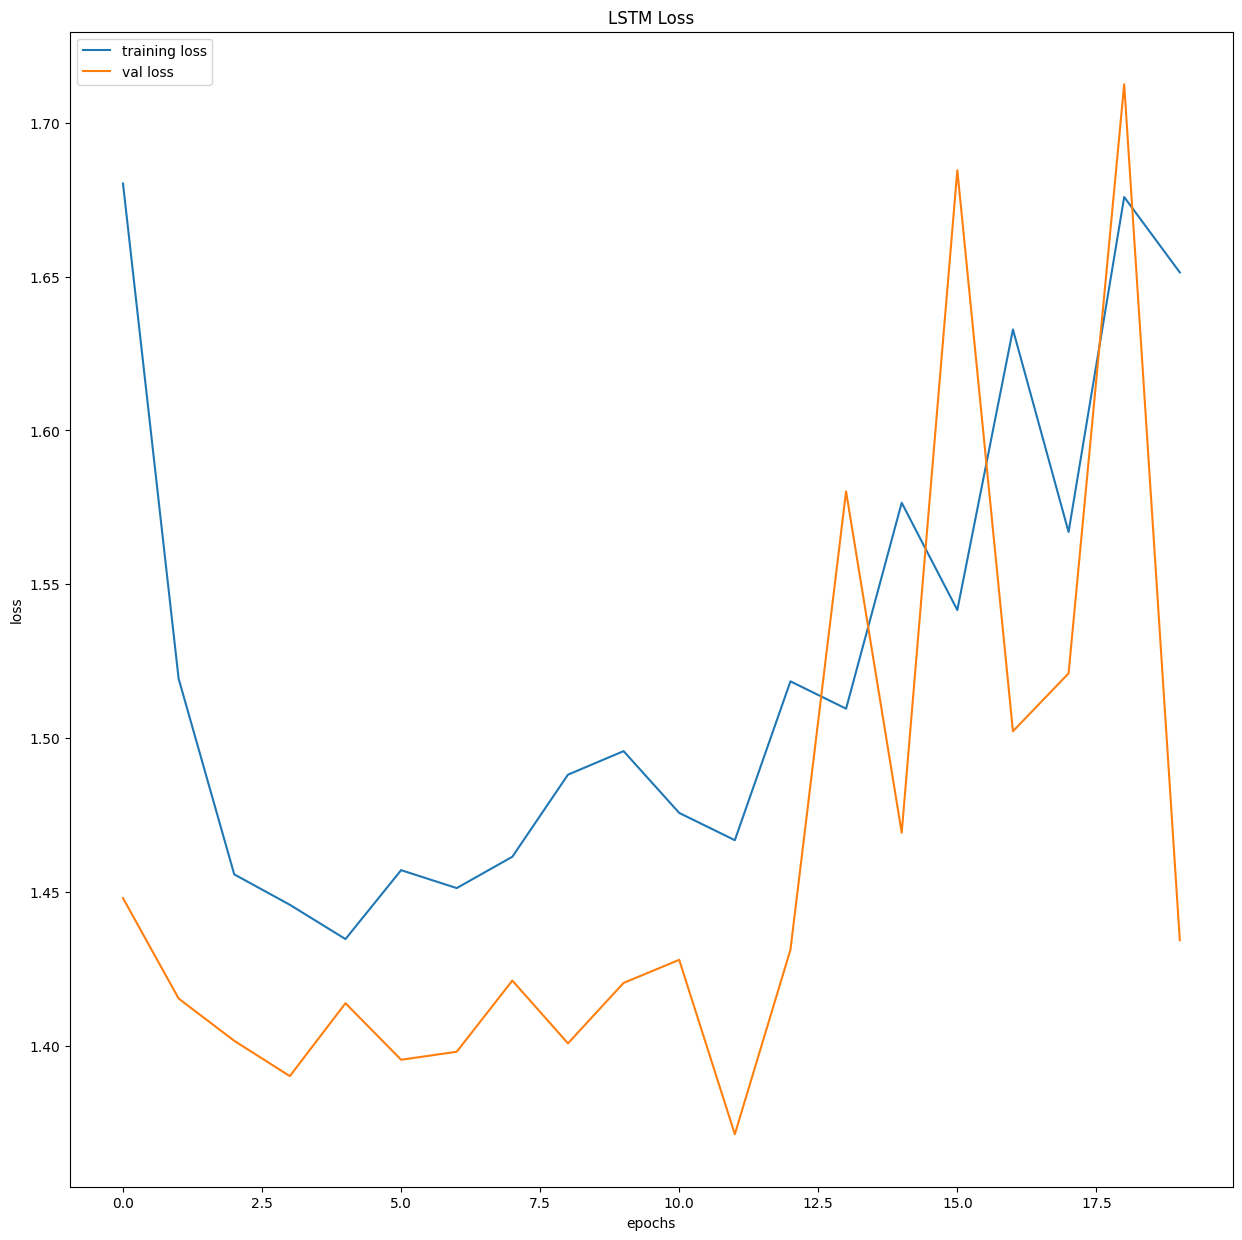

In [105]:
y_pred=lstm_model.predict(X_test)
y_pred = (y_pred > 0.45)
score=accuracy_score(y_pred,Y_test)
print('LSTM ', score*100 ,' % Accuracy')

# Accuracy 
plt.plot(lstm_history.history['accuracy'], label='training accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='val accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(lstm_history.history['loss'], label='training loss')
plt.plot(lstm_history.history['val_loss'], label='val loss')
plt.title('LSTM Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [106]:
# Obtain predictions on the test data
y_pred = lstm_model.predict( X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)
print("\n\n******************************\n\n")
# Call the function to print accuracy metrics
print_all_accuracy_matric(y_true_labels, y_pred_labels, "LSTM Model")
print("******************************\n\n")

1464/1464 [==============================] - 3s 2ms/step


******************************


LSTM Model : Accuracy: 0.470

LSTM Model : F1-score: 0.119

LSTM Model : Recall: 0.147

LSTM Model : Precision: 0.174


Classification Report


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      9966
           1       0.00      0.00      0.00       411
           2       0.58      0.48      0.53      9981
           3       0.00      0.00      0.00      2069
           4       0.29      0.72      0.41      9896
           5       0.00      0.00      0.00      1079
           6       0.00      0.00      0.00      1067
           7       0.00      0.00      0.00      1217
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          10       0.74      1.00      0.85     10063
          11       0.00      0.00      0.00       666
          12       0.00      0.00      0.00       282
       

# 3. GRU Algorithm

In [107]:
# Define a function to build the Keras model
def create_gru_model():
    # Create the model
    model = Sequential()
    model.add(Dense(84, input_dim=20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(70, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    # Reshape the output of the previous dense layer to match the DRU input shape
    model.add(Reshape((1, -1)))

    # Add DRU layer
    model.add(GRU(50))  # Adjust the number of units as needed

    model.add(Dense(56, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(42, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(28, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(15, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

gru_model = create_gru_model()
print(gru_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 84)                1764      
                                                                 
 dropout_25 (Dropout)        (None, 84)                0         
                                                                 
 dense_28 (Dense)            (None, 70)                5950      
                                                                 
 dropout_26 (Dropout)        (None, 70)                0         
                                                                 
 reshape_2 (Reshape)         (None, 1, 70)             0         
                                                                 
 gru (GRU)                   (None, 50)                18300     
                                                                 
 dense_29 (Dense)            (None, 56)               

In [108]:
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='gru_best_model.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min',
                             verbose=1)

gru_history = gru_model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=20, batch_size=256, callbacks=[checkpoint])

Epoch 1/20
731/732 [============================>.] - ETA: 0s - loss: 1.5331 - accuracy: 0.4514
Epoch 1: val_loss improved from inf to 1.37765, saving model to gru_best_model.h5
732/732 [==============================] - 11s 10ms/step - loss: 1.5330 - accuracy: 0.4514 - val_loss: 1.3776 - val_accuracy: 0.4826
Epoch 2/20
729/732 [============================>.] - ETA: 0s - loss: 1.4007 - accuracy: 0.4887
Epoch 2: val_loss improved from 1.37765 to 1.33174, saving model to gru_best_model.h5
732/732 [==============================] - 7s 9ms/step - loss: 1.4006 - accuracy: 0.4887 - val_loss: 1.3317 - val_accuracy: 0.5002
Epoch 3/20
727/732 [============================>.] - ETA: 0s - loss: 1.3622 - accuracy: 0.5020
Epoch 3: val_loss improved from 1.33174 to 1.29437, saving model to gru_best_model.h5
732/732 [==============================] - 7s 9ms/step - loss: 1.3622 - accuracy: 0.5019 - val_loss: 1.2944 - val_accuracy: 0.5181
Epoch 4/20
730/732 [============================>.] - ETA: 0s -

1464/1464 [==============================] - 4s 2ms/step
GRU  36.54297792390794  % Accuracy


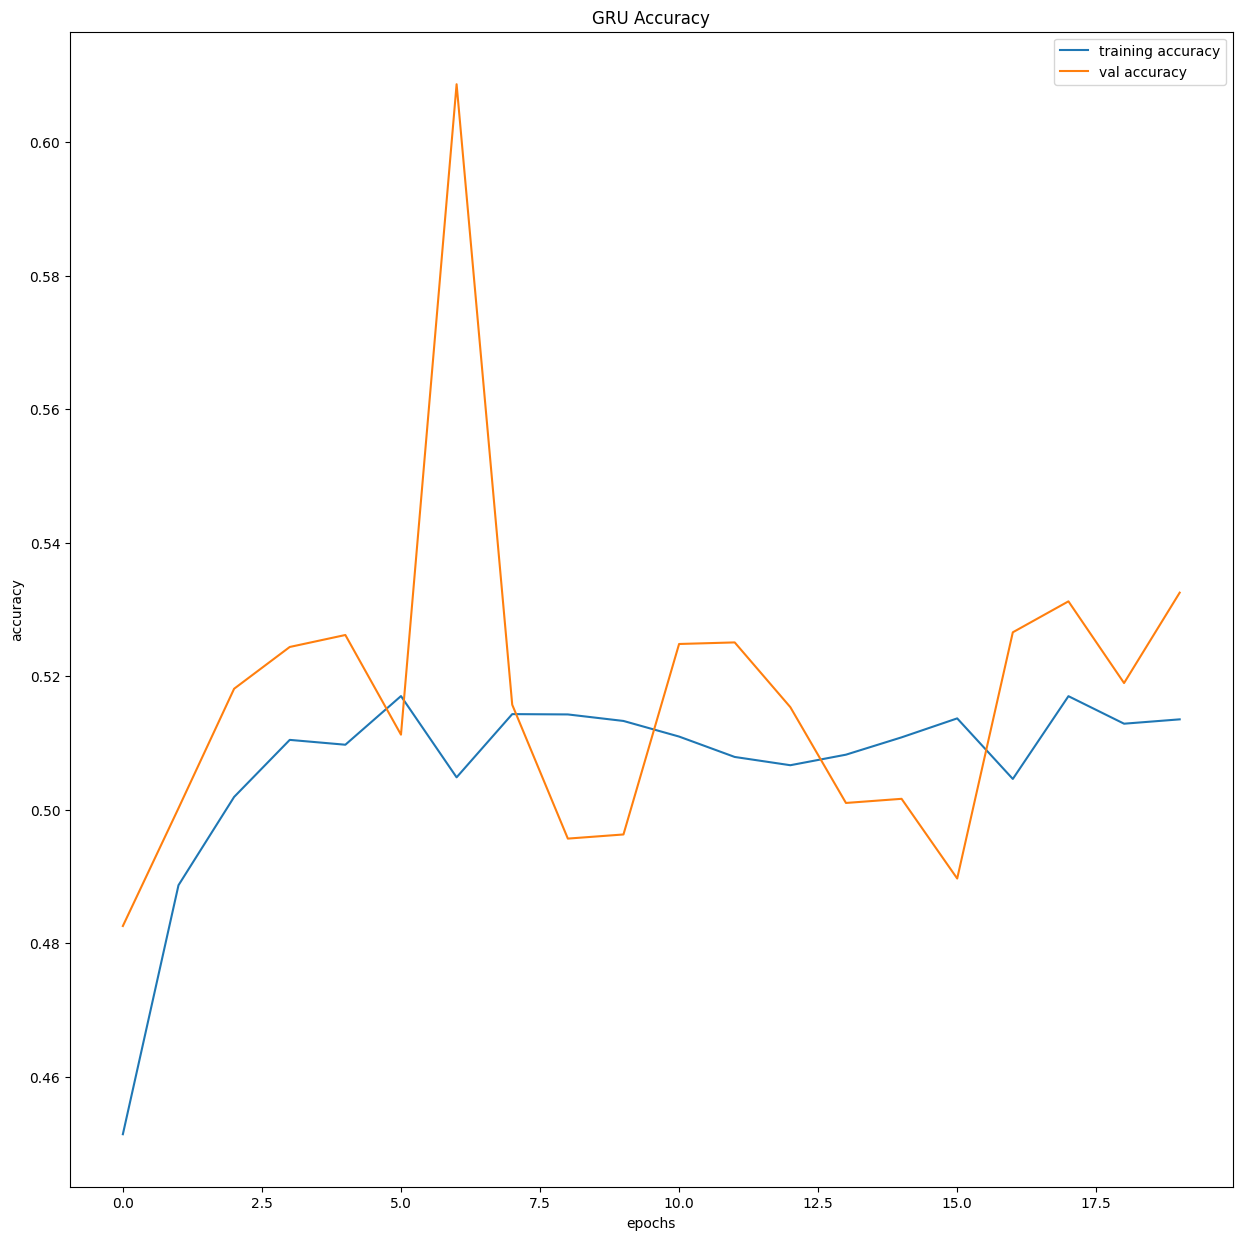

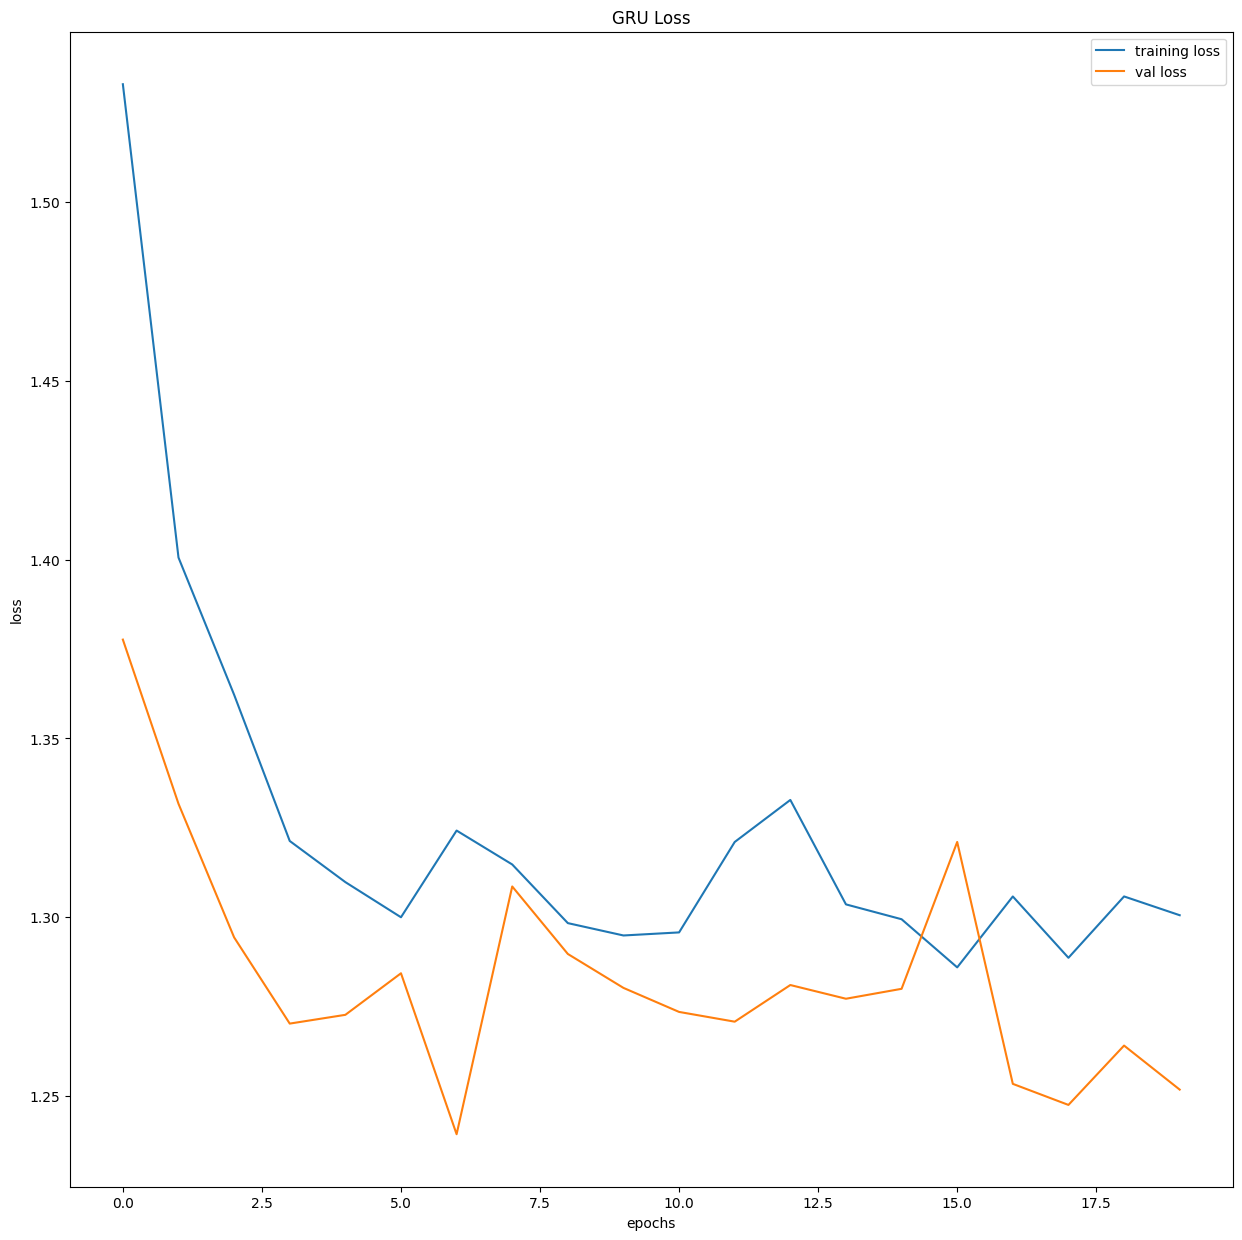

In [109]:
y_pred=gru_model.predict(X_test)
y_pred = (y_pred > 0.45)
score=accuracy_score(y_pred,Y_test)
print('GRU ', score*100 ,' % Accuracy')

# Accuracy 
plt.plot(gru_history.history['accuracy'], label='training accuracy')
plt.plot(gru_history.history['val_accuracy'], label='val accuracy')
plt.title('GRU Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(gru_history.history['loss'], label='training loss')
plt.plot(gru_history.history['val_loss'], label='val loss')
plt.title('GRU Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [110]:
# Obtain predictions on the test data
y_pred = gru_model.predict( X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)
print("\n\n**************************************\n\n")
# Call the function to print accuracy metrics
print_all_accuracy_matric(y_true_labels, y_pred_labels, "GRU Model")
print("**************************************\n\n")

1464/1464 [==============================] - 3s 2ms/step


**************************************


GRU Model : Accuracy: 0.533

GRU Model : F1-score: 0.158

GRU Model : Recall: 0.167

GRU Model : Precision: 0.178


Classification Report


              precision    recall  f1-score   support

           0       0.82      0.31      0.45      9966
           1       0.00      0.00      0.00       411
           2       0.61      0.46      0.52      9981
           3       0.00      0.00      0.00      2069
           4       0.29      0.74      0.42      9896
           5       0.00      0.00      0.00      1079
           6       0.00      0.00      0.00      1067
           7       0.00      0.00      0.00      1217
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          10       0.96      0.99      0.97     10063
          11       0.00      0.00      0.00       666
          12       0.00      0.00      0.00       282
   

# Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming X_train is your training data
input_dim = X_train.shape[1]

# Define the architecture of the autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model with mean squared error and binary accuracy
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['binary_accuracy'])

# Train the autoencoder and monitor MSE and binary accuracy on the validation set
history = autoencoder.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

# Save the model
autoencoder.save("autoencoder_model.h5")


# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
